# Japanese Grand Prix

The Japanese Grand Prix (Japanese: 日本グランプリ) is a motor racing event in the calendar of the Formula One World Championship. Historically, Japan has been one of the last races of the season, and as such the Japanese Grand Prix has been the venue for many title-deciding races, with 13 World Drivers' Champions being crowned over the 36 World Championship Japanese Grands Prix that have been hosted. Japan was the only Asian nation to host a Formula One race (including the Pacific Grand Prix) until Malaysia joined the calendar in 1999. Source: Wikipedia

In [289]:
from urllib.request import urlopen
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

First of all it is neccesary to obtain all the data of the 2024 sessions in order to obtain some data as session_key,country_key,country_code and circuit_key

In [290]:
response = urlopen('https://api.openf1.org/v1/sessions?year=2024')
data = json.loads(response.read().decode('utf-8'))
calendar = pd.DataFrame(data)
calendar

,session_key,session_name,date_start,date_end,gmt_offset,session_type,meeting_key,location,country_key,country_code,country_name,circuit_key,circuit_short_name,year
0,9465,Practice 1,2024-02-29T11:30:00,2024-02-29T12:30:00,03:00:00,Practice,1229,Sakhir,36,BRN,Bahrain,63,Sakhir,2024
1,9466,Practice 2,2024-02-29T15:00:00,2024-02-29T16:00:00,03:00:00,Practice,1229,Sakhir,36,BRN,Bahrain,63,Sakhir,2024
2,9467,Practice 3,2024-03-01T12:30:00,2024-03-01T13:30:00,03:00:00,Practice,1229,Sakhir,36,BRN,Bahrain,63,Sakhir,2024
3,9468,Qualifying,2024-03-01T16:00:00,2024-03-01T17:00:00,03:00:00,Qualifying,1229,Sakhir,36,BRN,Bahrain,63,Sakhir,2024
4,9472,Race,2024-03-02T15:00:00,2024-03-02T17:00:00,03:00:00,Race,1229,Sakhir,36,BRN,Bahrain,63,Sakhir,2024
5,9473,Practice 1,2024-03-07T13:30:00,2024-03-07T14:30:00,03:00:00,Practice,1230,Jeddah,153,KSA,Saudi Arabia,149,Jeddah,2024
6,9474,Practice 2,2024-03-07T17:00:00,2024-03-07T18:00:00,03:00:00,Practice,1230,Jeddah,153,KSA,Saudi Arabia,149,Jeddah,2024
7,9475,Practice 3,2024-03-08T13:30:00,2024-03-08T14:30:00,03:00:00,Practice,1230,Jeddah,153,KSA,Saudi Arabia,149,Jeddah,2024
8,9476,Qualifying,2024-03-08T17:00:00,2024-03-08T18:00:00,03:00:00,Qualifying,1230,Jeddah,153,KSA,Saudi Arabia,149,Jeddah,2024
9,9480,Race,2024-03-09T17:00:00,2024-03-09T19:00:00,03:00:00,Race,1230,Jeddah,153,KSA,Saudi Arabia,149,Jeddah,2024


## Setup
It will be saved those attributes aforementioned.


In [291]:
session_key='session_key=9489'
country_key='country_key=4'
country_code="country_code='JPN'"
circuit_key='circuit_key=46'
year = 'year=2024'

## Free Practice 1

### Laps

In [292]:
url = 'https://api.openf1.org/v1/laps?'

urltotal = url+session_key

response = urlopen(urltotal)
data = json.loads(response.read().decode('utf-8'))
practice1 = pd.DataFrame(data)
practice1

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,segments_sector_1,segments_sector_2,segments_sector_3,lap_number
0,1232,9489,18,268.0,199.0,227.0,2024-04-05T02:30:06.023000,NaN,True,NaN,48.563,22.669,"[2064, 2064, 2049, 2051, 2049, 2051, 2051, 204...","[2049, 2051, 2051, 2051, 2051, 2051, 2049, 204...","[2048, 2048, 2048, 2064, 2064]",1
1,1232,9489,40,252.0,284.0,262.0,2024-04-05T02:30:13.979000,NaN,True,NaN,52.248,21.415,"[2064, 2064, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2048, 2064, 2064]",1
2,1232,9489,77,249.0,248.0,248.0,2024-04-05T02:30:20.039000,NaN,True,NaN,47.247,23.148,"[2064, 2064, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2048, 2048, 2049, 2049]",1
3,1232,9489,44,255.0,257.0,234.0,2024-04-05T02:30:20.527000,NaN,True,NaN,51.403,23.758,"[2064, 2064, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2051, 2051, 2051, 2051, 2051]",1
4,1232,9489,31,237.0,262.0,155.0,2024-04-05T02:30:35.638000,NaN,True,NaN,51.508,42.226,"[2064, 2064, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 0]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,1232,9489,14,274.0,177.0,250.0,2024-04-05T03:33:29.501000,152.912,False,71.027,53.890,27.995,"[None, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...",[],20
379,1232,9489,20,274.0,271.0,273.0,2024-04-05T03:33:33.537000,140.470,False,73.690,44.889,21.891,"[None, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...",[],21
380,1232,9489,18,276.0,277.0,263.0,2024-04-05T03:33:34.337000,129.395,False,61.085,44.309,24.001,"[None, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...",[],17
381,1232,9489,24,270.0,210.0,139.0,2024-04-05T03:33:38.997000,149.488,False,71.511,46.808,31.169,"[None, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...",[],18


### Stints

In [293]:
#Stints
url = 'https://api.openf1.org/v1/stints?'

urltotal = url+session_key

response = urlopen(urltotal)
data = json.loads(response.read().decode('utf-8'))
stintInformation = pd.DataFrame(data)
stintInformation

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
0,1232,9489,1,1,1,2,HARD,0
1,1232,9489,1,23,1,2,MEDIUM,0
2,1232,9489,1,77,1,2,MEDIUM,0
3,1232,9489,1,18,1,3,MEDIUM,0
4,1232,9489,1,40,1,3,MEDIUM,0
...,...,...,...,...,...,...,...,...
74,1232,9489,4,24,17,19,MEDIUM,0
75,1232,9489,4,20,17,22,SOFT,7
76,1232,9489,4,22,19,21,MEDIUM,11
77,1232,9489,6,10,20,24,SOFT,6


### Drivers

In [294]:
# Name of the drivers
url = 'https://api.openf1.org/v1/drivers?'
# In this case, due to Open URL does not refresh well the feature drivers, I will catch Practice 1 drivers as a reference.
#session_key = 'session_key=9472'
urltotal = url+session_key

response = urlopen(urltotal)
drivers = json.loads(response.read().decode('utf-8'))
drivers = pd.DataFrame(drivers)
# Restore the session key
#session_key='session_key=9481'
drivers

,session_key,meeting_key,broadcast_name,country_code,first_name,full_name,headshot_url,last_name,driver_number,team_colour,team_name,name_acronym
0,9489,1232,M VERSTAPPEN,None,None,Max VERSTAPPEN,None,None,1,None,None,VER
1,9489,1232,L SARGEANT,None,None,Logan SARGEANT,None,None,2,None,None,SAR
2,9489,1232,L NORRIS,None,None,Lando NORRIS,None,None,4,None,None,NOR
3,9489,1232,P GASLY,None,None,Pierre GASLY,None,None,10,None,None,GAS
4,9489,1232,S PEREZ,None,None,Sergio PEREZ,None,None,11,None,None,PER
5,9489,1232,F ALONSO,None,None,Fernando ALONSO,None,None,14,None,None,ALO
6,9489,1232,C LECLERC,None,None,Charles LECLERC,None,None,16,None,None,LEC
7,9489,1232,L STROLL,None,None,Lance STROLL,None,None,18,None,None,STR
8,9489,1232,K MAGNUSSEN,None,None,Kevin MAGNUSSEN,None,None,20,None,None,MAG
9,9489,1232,Y TSUNODA,None,None,Yuki TSUNODA,None,None,22,None,None,TSU


### Merge tables

In [295]:
stintsDataFrame = pd.DataFrame()
for index,row in stintInformation.iterrows():
    number_driver = row.driver_number
    acronym_driver = drivers.query('driver_number == @number_driver').name_acronym.to_string(index=False)
    full_name = drivers.query('driver_number == @number_driver').full_name.to_string(index=False)
    team_name = drivers.query('driver_number == @number_driver').team_name.to_string(index=False)
    if row.lap_start != row.lap_end:
        contador = row.lap_start
        while contador <=row.lap_end :
            new_row = {'driver_number':row.driver_number,'compound':row.compound,'lap_number':contador,'name_acronym':acronym_driver,'full_name':full_name,'team_name':team_name}
            stintsDataFrame = pd.concat([stintsDataFrame, pd.DataFrame([new_row])], ignore_index=True)
            contador+=1
    else:
    
        new_row = {'driver_number':row.driver_number,'compound':row.compound,'lap_number':row.lap_start,'name_acronym':acronym_driver,'full_name':full_name,'team_name':team_name}
        stintsDataFrame =pd.concat([stintsDataFrame, pd.DataFrame([new_row])], ignore_index=True)

In [296]:
jointables = pd.merge(practice1,stintsDataFrame,on=['lap_number','driver_number'])
jointables

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,segments_sector_1,segments_sector_2,segments_sector_3,lap_number,compound,name_acronym,full_name,team_name
0,1232,9489,18,268.0,199.0,227.0,2024-04-05T02:30:06.023000,NaN,True,NaN,48.563,22.669,"[2064, 2064, 2049, 2051, 2049, 2051, 2051, 204...","[2049, 2051, 2051, 2051, 2051, 2051, 2049, 204...","[2048, 2048, 2048, 2064, 2064]",1,MEDIUM,STR,Lance STROLL,None
1,1232,9489,40,252.0,284.0,262.0,2024-04-05T02:30:13.979000,NaN,True,NaN,52.248,21.415,"[2064, 2064, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2048, 2064, 2064]",1,MEDIUM,IWA,Ayumu IWASA,None
2,1232,9489,77,249.0,248.0,248.0,2024-04-05T02:30:20.039000,NaN,True,NaN,47.247,23.148,"[2064, 2064, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2048, 2048, 2049, 2049]",1,MEDIUM,BOT,Valtteri BOTTAS,None
3,1232,9489,44,255.0,257.0,234.0,2024-04-05T02:30:20.527000,NaN,True,NaN,51.403,23.758,"[2064, 2064, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2051, 2051, 2051, 2051, 2051]",1,MEDIUM,HAM,Lewis HAMILTON,None
4,1232,9489,31,237.0,262.0,155.0,2024-04-05T02:30:35.638000,NaN,True,NaN,51.508,42.226,"[2064, 2064, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 0]",1,MEDIUM,OCO,Esteban OCON,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,1232,9489,14,274.0,177.0,250.0,2024-04-05T03:33:29.501000,152.912,False,71.027,53.890,27.995,"[None, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...",[],20,SOFT,ALO,Fernando ALONSO,None
379,1232,9489,20,274.0,271.0,273.0,2024-04-05T03:33:33.537000,140.470,False,73.690,44.889,21.891,"[None, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...",[],21,SOFT,MAG,Kevin MAGNUSSEN,None
380,1232,9489,18,276.0,277.0,263.0,2024-04-05T03:33:34.337000,129.395,False,61.085,44.309,24.001,"[None, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...",[],17,SOFT,STR,Lance STROLL,None
381,1232,9489,24,270.0,210.0,139.0,2024-04-05T03:33:38.997000,149.488,False,71.511,46.808,31.169,"[None, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...",[],18,MEDIUM,ZHO,ZHOU Guanyu,None


### Data tyres

In [297]:
def define_colour(compound):
    if compound == "SOFT":
        colour = "red"
    elif compound == "MEDIUM":
        colour = "yellow"
    elif compound == "HARD":
        colour = "grey"
    elif compound == "INTERMEDIATE":
        colour = "green"
    else:
        colour = "blue"
    return colour

In [298]:
def show_plot(arrayDataframes,colour):
    figure, axis = plt.subplots(len(arrayDataframes),figsize=(15,30))
    #plt.xlim(92, 96)
    i=0
    for arr in arrayDataframes:
        arr.reset_index(drop=True, inplace=True)
        axis[(i)].plot( arr.lap_duration,marker ="o",color=colour,label = str(arr.full_name[0]) )
        axis[i].set_xlabel("Lap time")
        axis[i].set_ylabel("Lap Time Seconds")
        axis[i].legend()
        i = i+1

In [299]:
def obtain_data_tyres(dataset,compound,race):
    extra = ''
    if race == False:
        extra = ' and lap_duration <97'
    setTyres = dataset.query('compound == @compound'+extra)
    drivers_number = []
    set_dict = {}
    for index,row in setTyres.iterrows():
        if row.driver_number not in drivers_number:
            set_dict[row.driver_number] = []
            drivers_number.append(row.driver_number)

        set_dict[row.driver_number].append(row)

    arrayDataframes = []
    for valor in set_dict.values():
        arrayDataframes.append(pd.DataFrame(valor))
    colour = define_colour(compound)
    show_plot(arrayDataframes,colour)

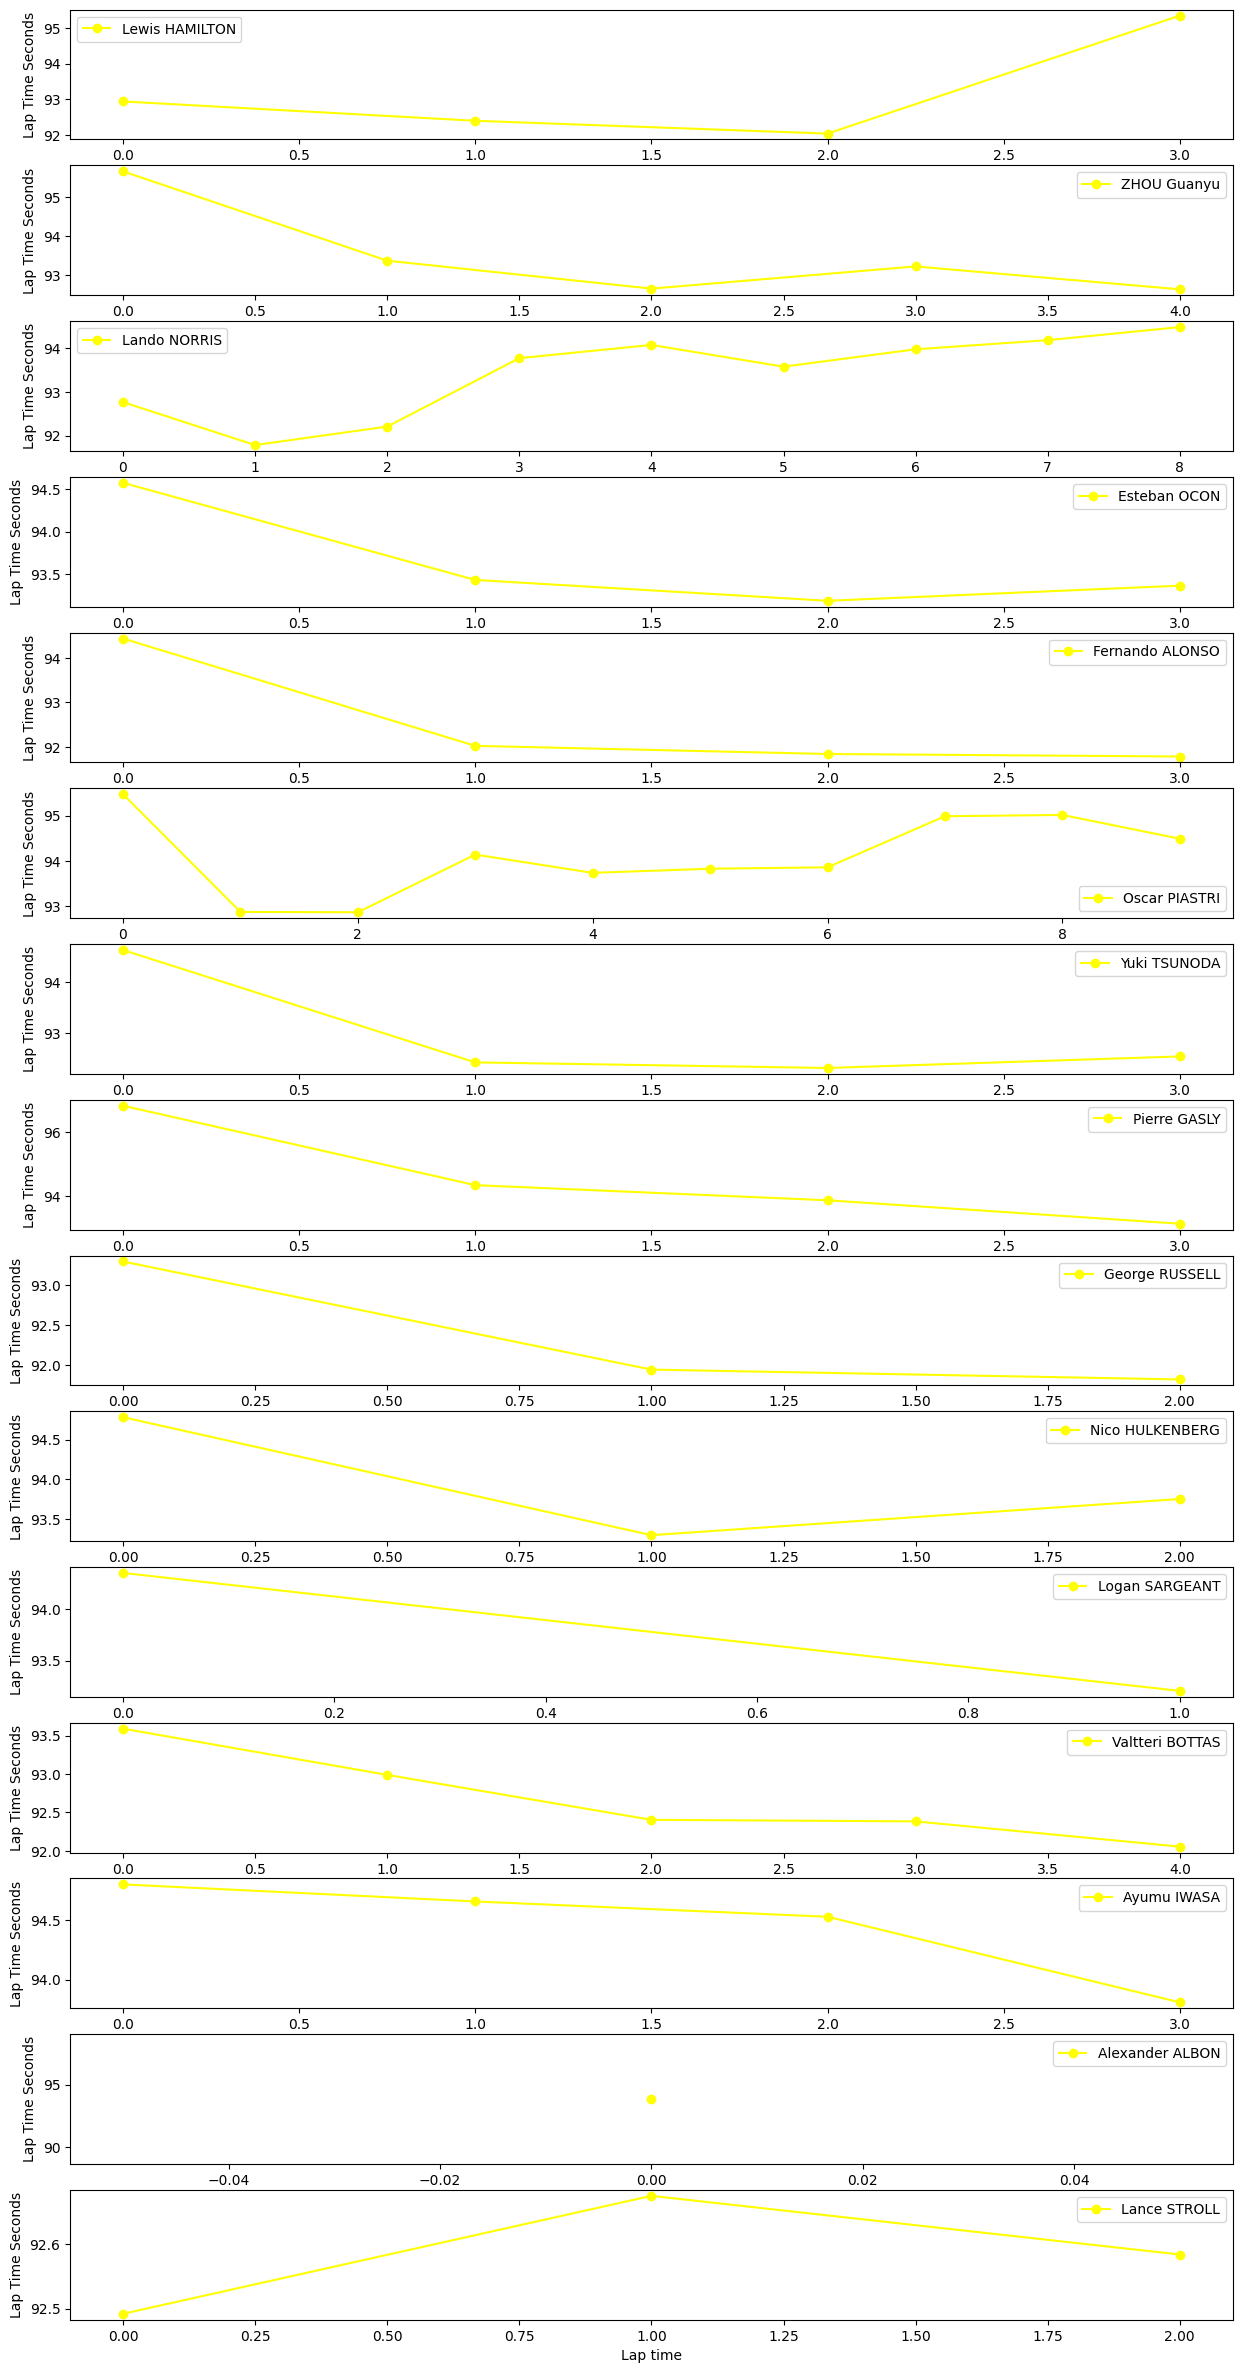

In [300]:
obtain_data_tyres(jointables,"MEDIUM",False)

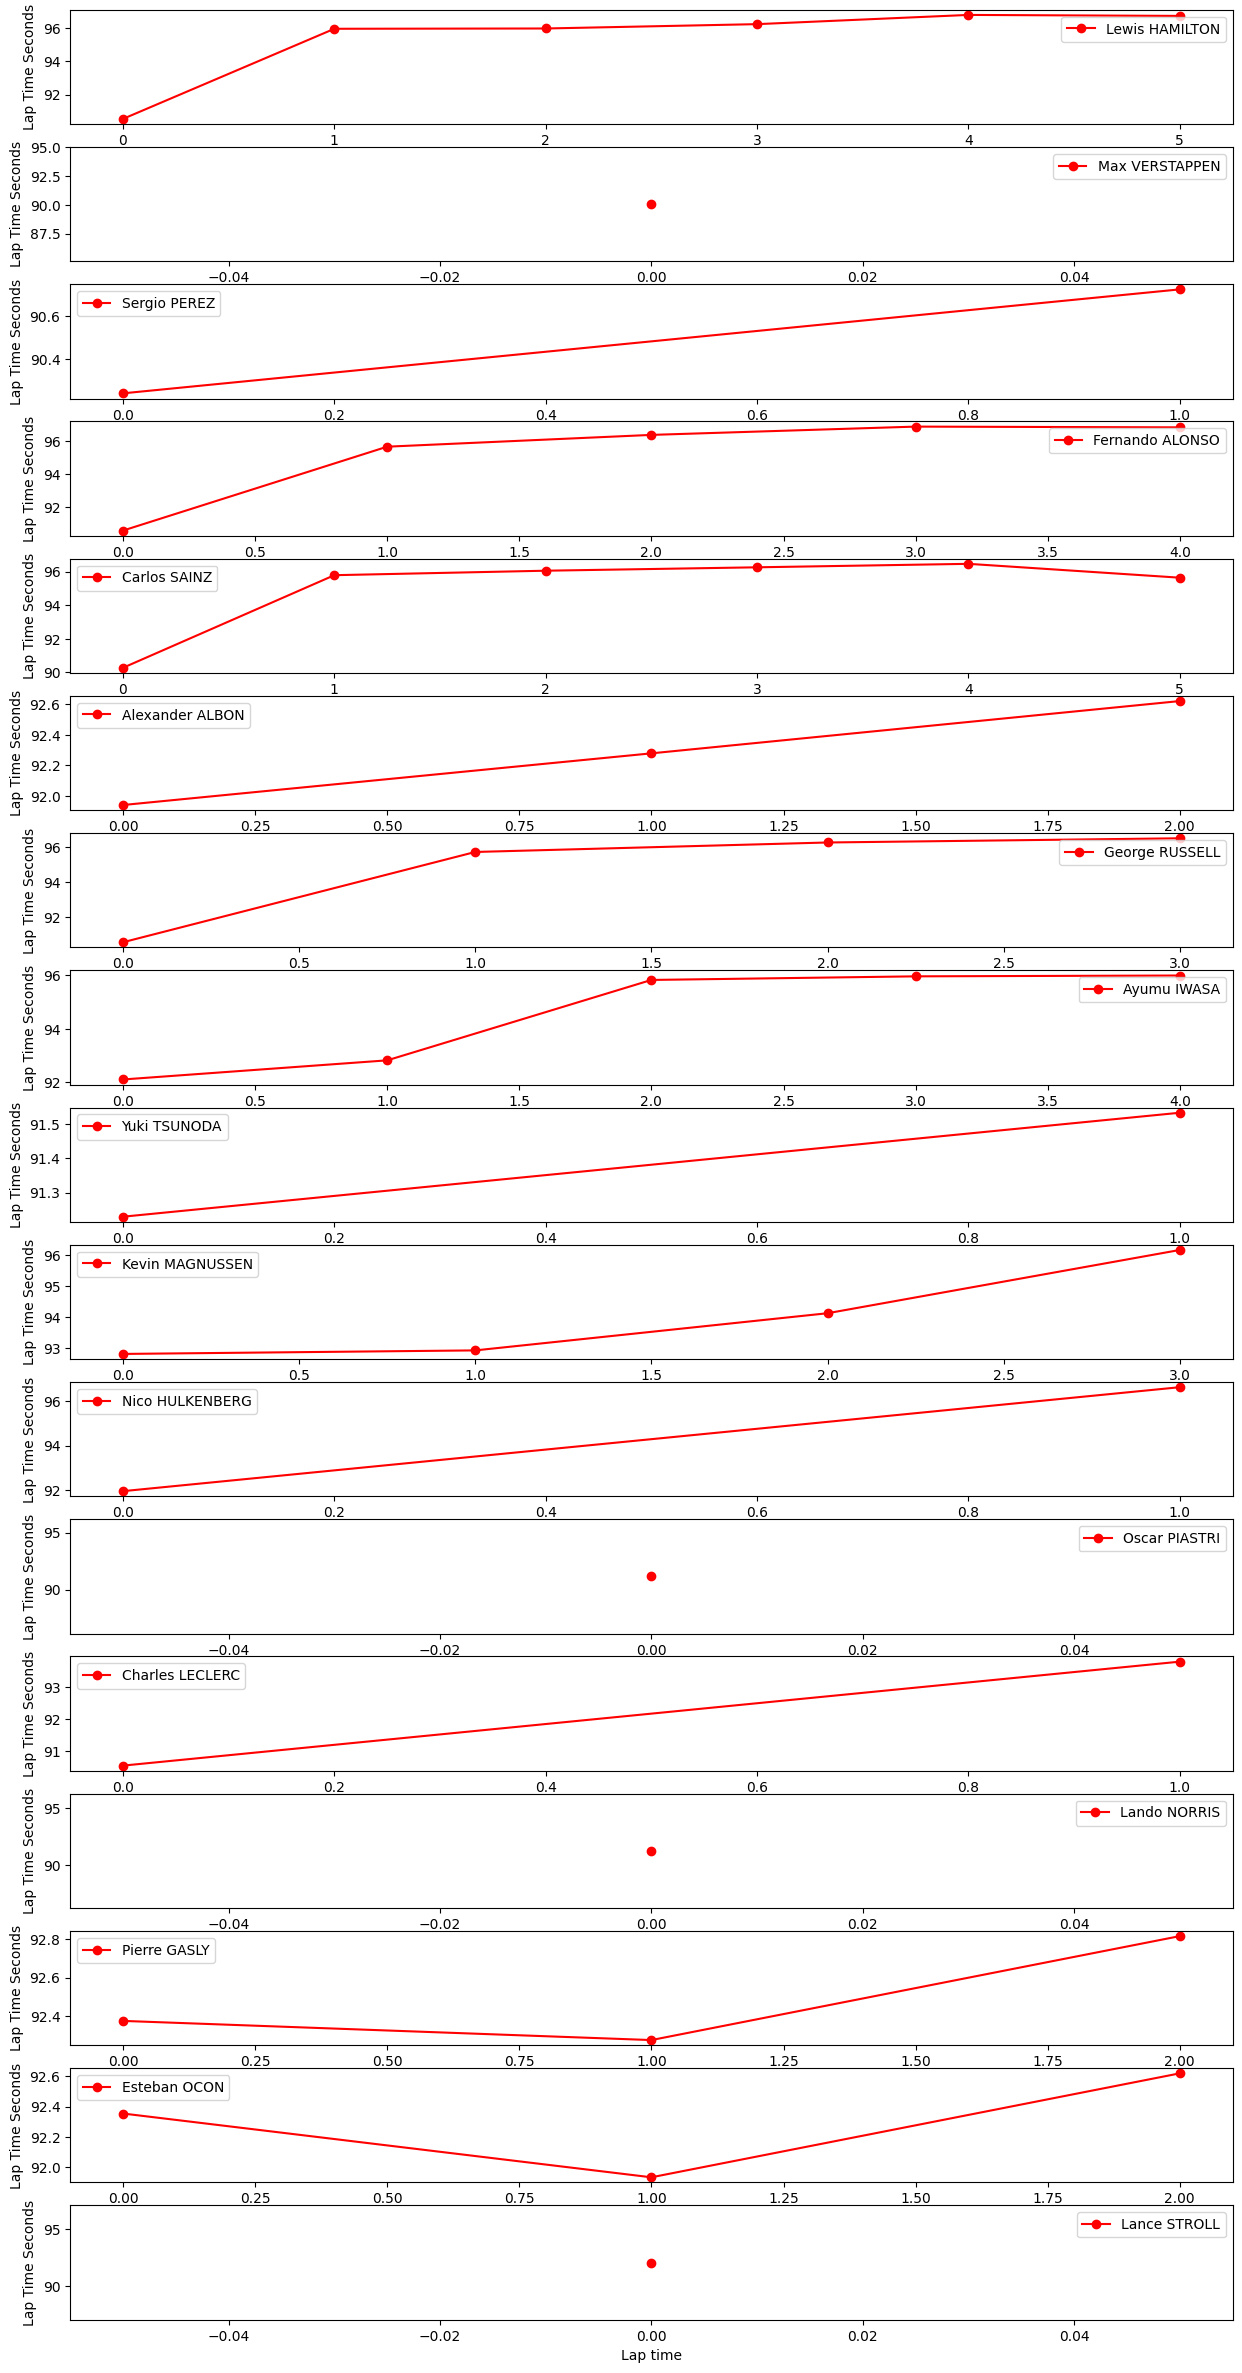

In [301]:
obtain_data_tyres(jointables,"SOFT",False)

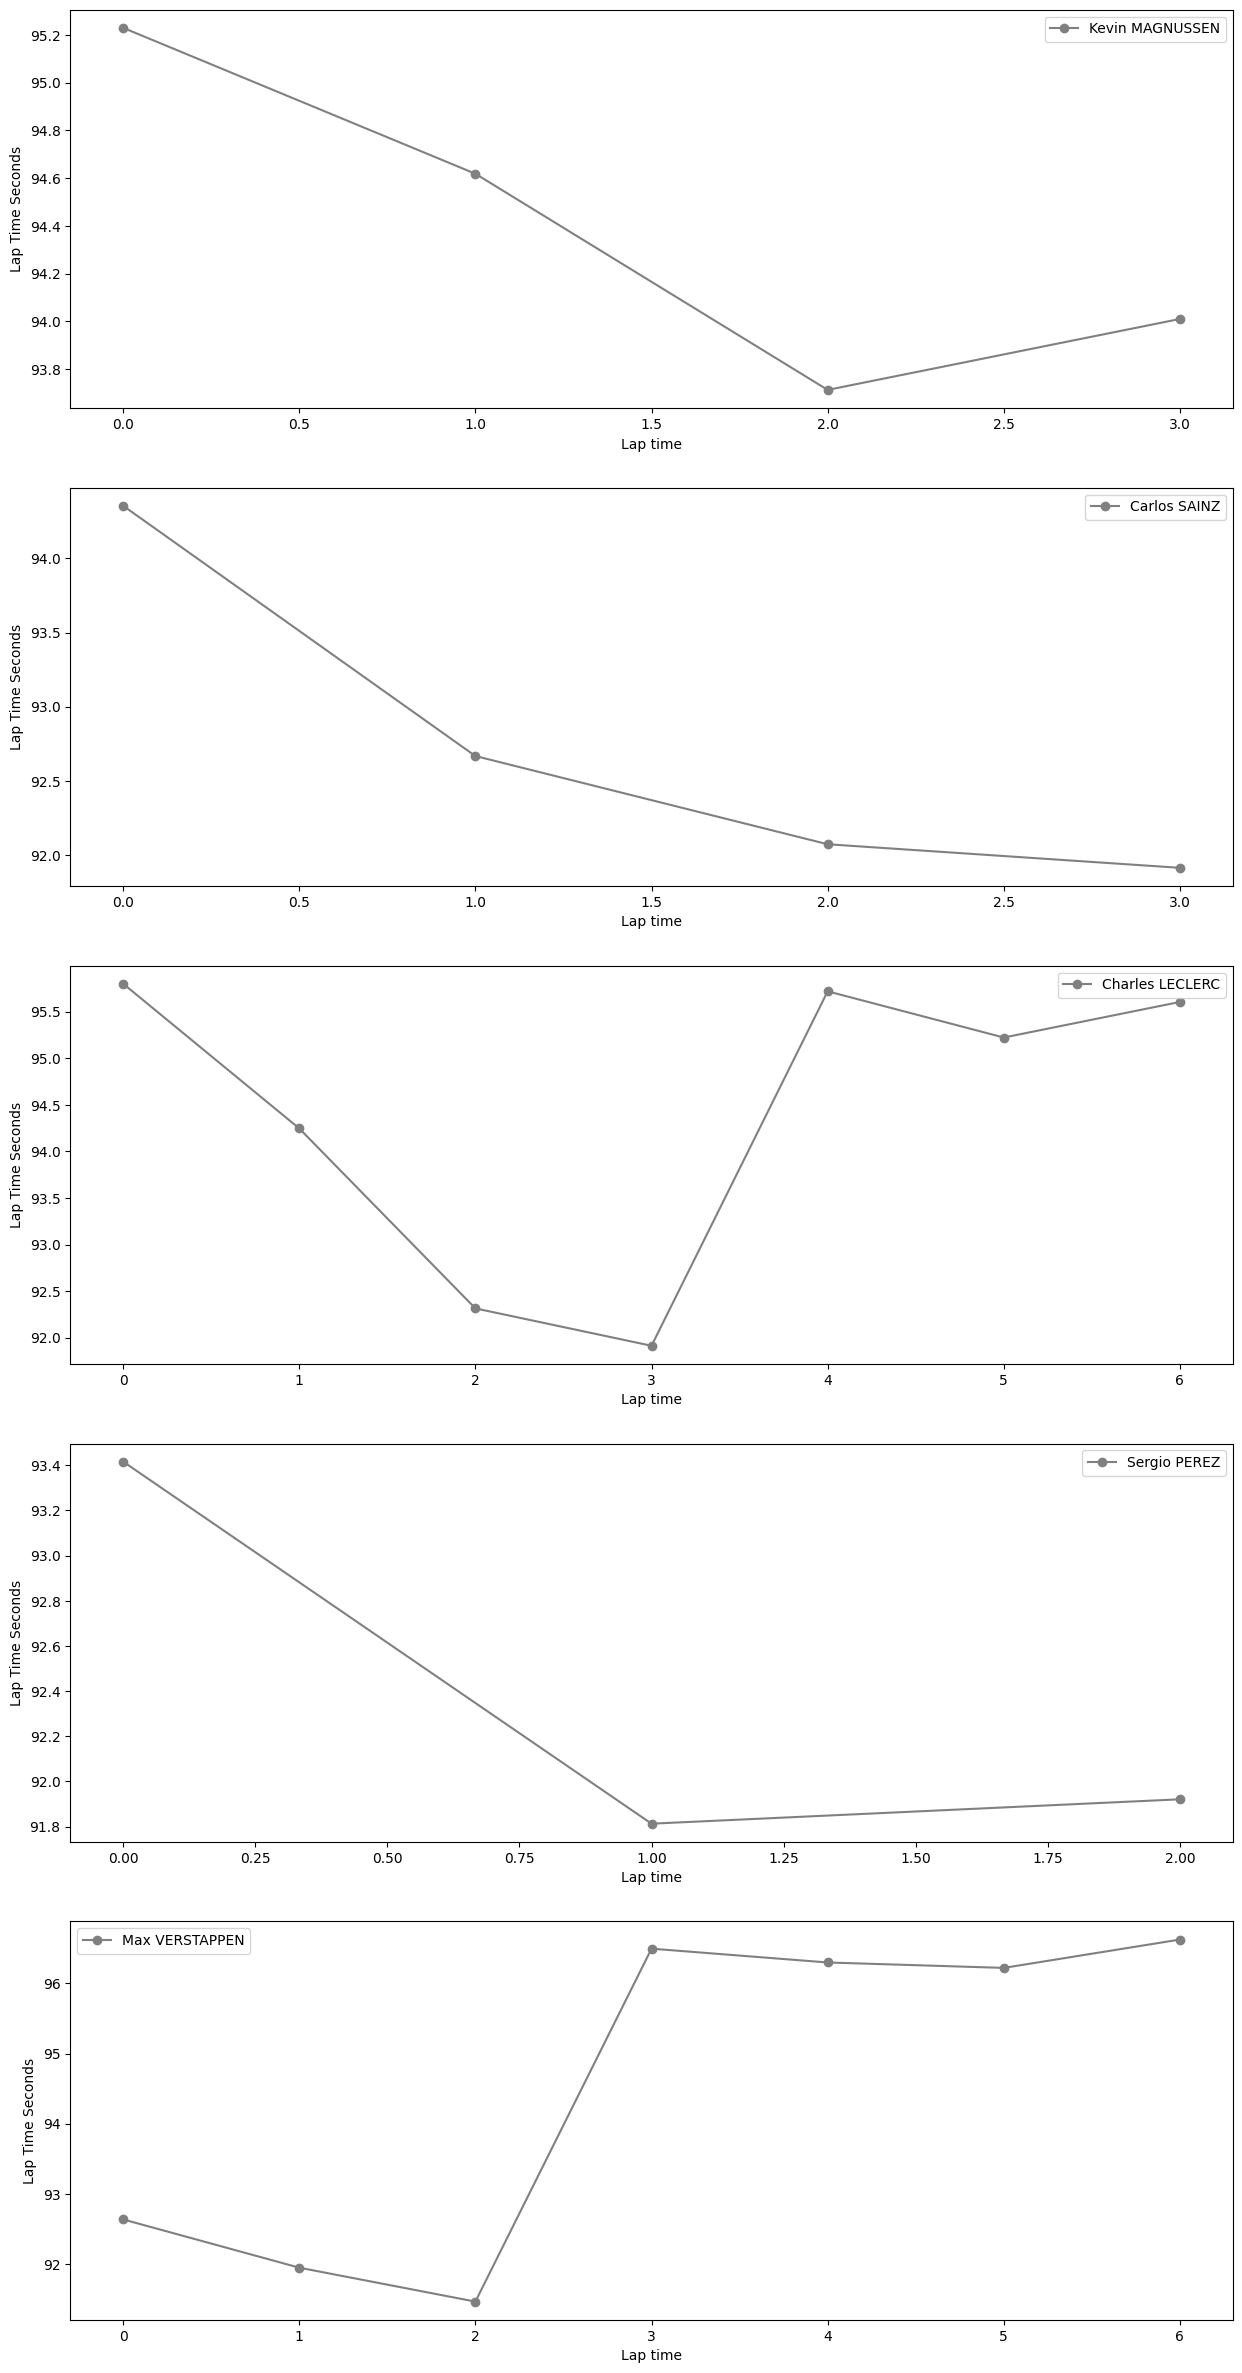

In [302]:
obtain_data_tyres(jointables,"HARD",False)

In [303]:
# Source: https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
def obtainchart(xvariable,yvariable,dataset):
    plt.figure(figsize=(12, 9))
    plots = sns.barplot(x=xvariable, y=yvariable, data=dataset,color='red')
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.3f'), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=8, xytext=(0, 7),
                       textcoords='offset points')
    plt.show()

### Top speed

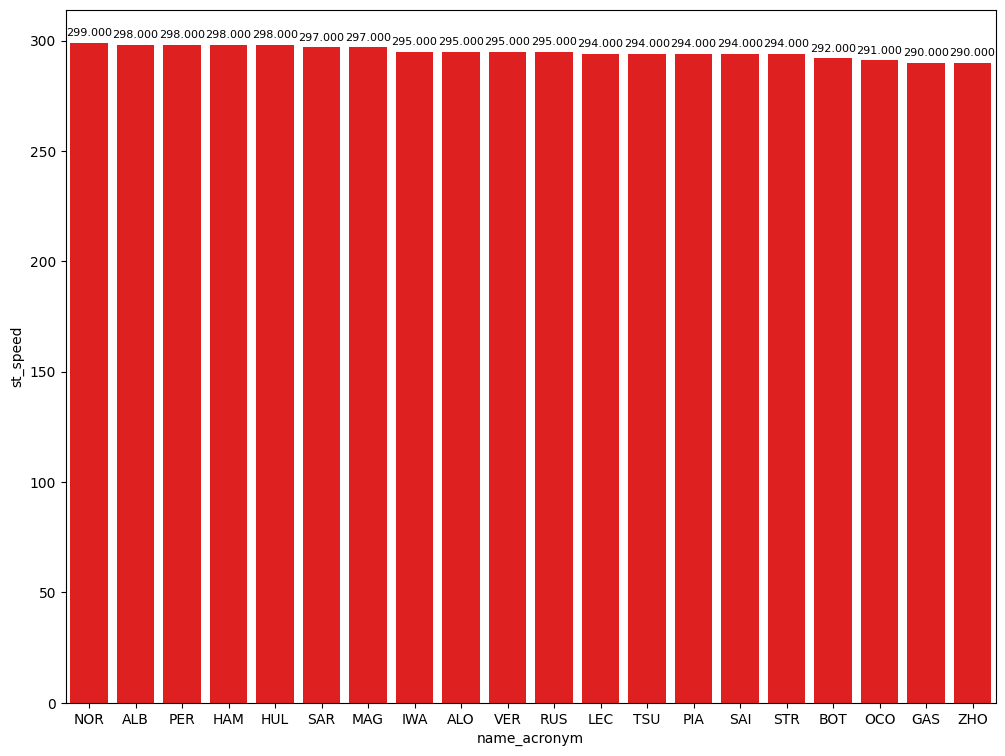

In [304]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
obtainchart("name_acronym","st_speed",top_speed)

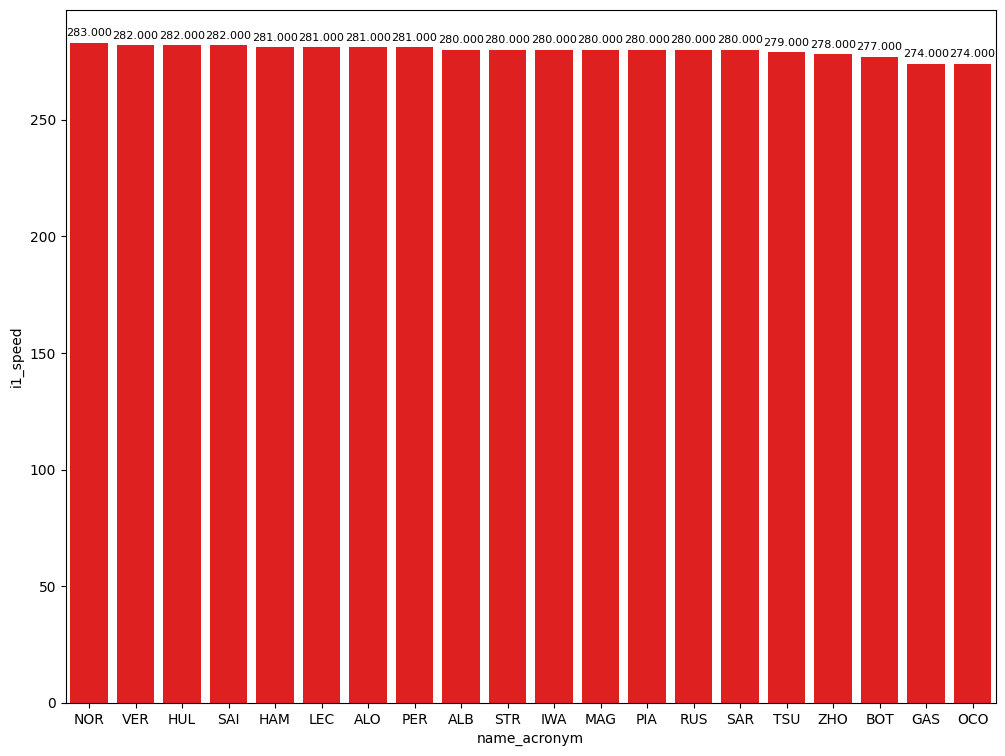

In [305]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
obtainchart("name_acronym","i1_speed",top_speed)

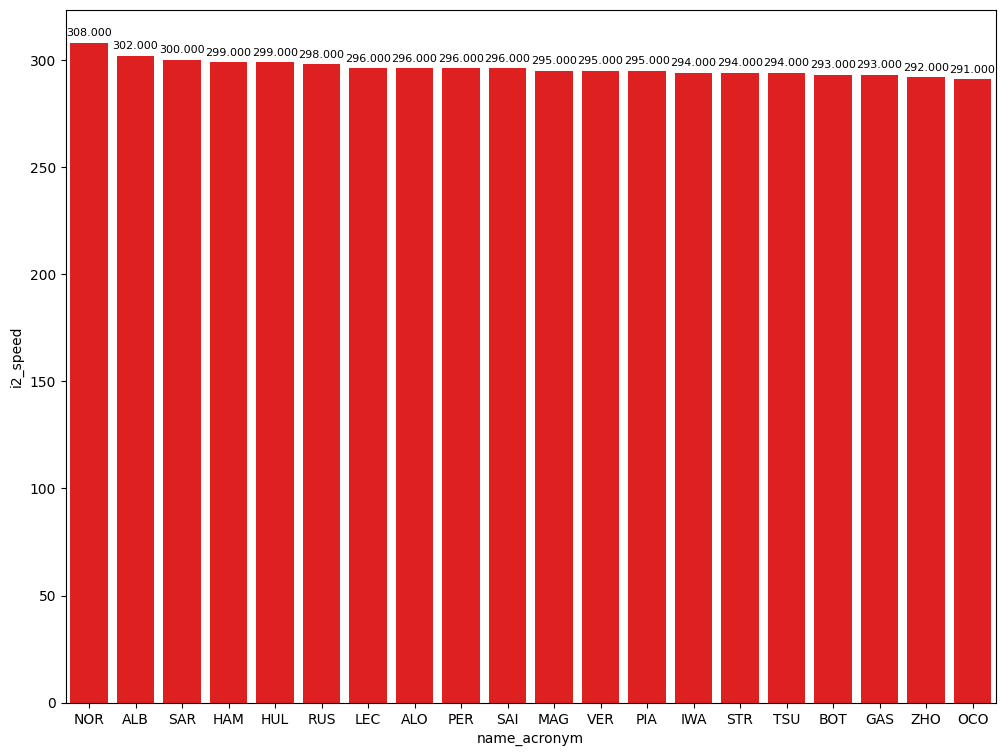

In [306]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound

In [307]:
compoundsPace = jointables.loc[jointables.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

,full_name,compound,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
146,Max VERSTAPPEN,HARD,32.166,41.363,17.934,91.463
53,Lando NORRIS,MEDIUM,32.117,41.298,18.366,91.781
197,Max VERSTAPPEN,SOFT,31.603,40.617,17.836,90.056


### Fastest lap

In [308]:
def obtain_fastest_lap(driver,dataset,newdataset):
    fastest_lap = dataset.query("driver_number == @driver").lap_duration.min()
    team_name = dataset.query("driver_number == @driver").head(1).team_name.to_string(index=False)
    #team_colour = dataset.query("driver_number == @driver").head(1).team_colour.to_string(index=False)
    name_acronym = dataset.query('driver_number == @driver').head(1).name_acronym.to_string(index=False)
    new_row = {'driver_number':driver,'fastest_lap':fastest_lap,'name_acronym': name_acronym, 'team_name':team_name}
    newdataset =pd.concat([newdataset, pd.DataFrame([new_row])], ignore_index=True)
    return newdataset

In [309]:
def obtain_deltas(dataset,array):
    fastest_lap = dataset.fastest_lap.min()
    for row in dataset.iterrows():
        lap = row[1][1]
        delta = lap-fastest_lap
        array.append(delta)
    return array

In [310]:
practiceCleaned = jointables.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =obtain_fastest_lap(driver,practiceCleaned,newdataset)

In [311]:
arr= obtain_deltas(newdataset,[])
newdataset.insert(3,'delta',arr)

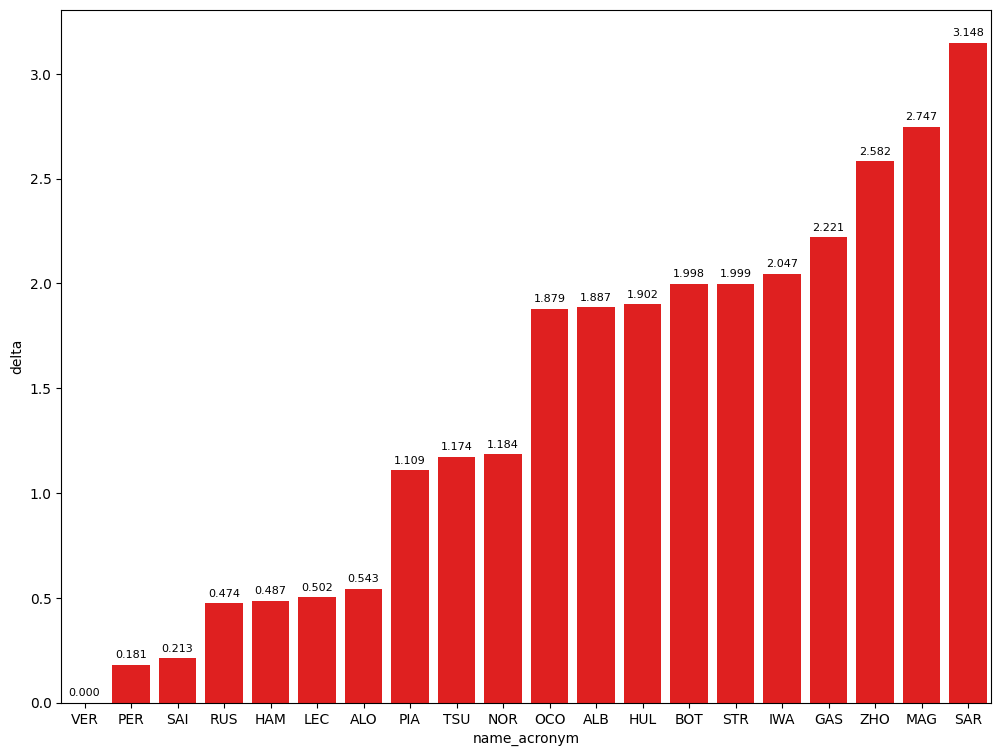

In [312]:
dt = newdataset.sort_values(ascending=True,by='delta')
obtainchart("name_acronym","delta",dt)

Text(0.5, 0.98, 'drivers')

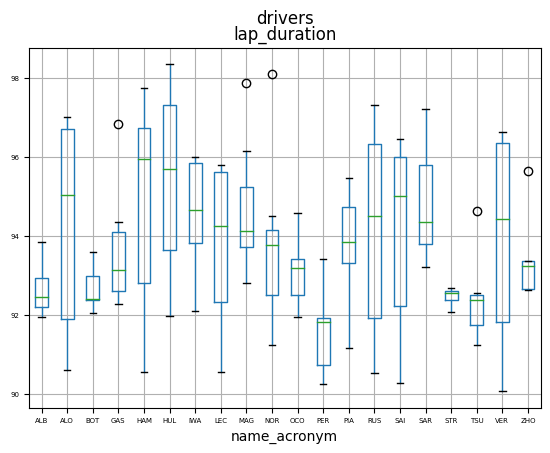

In [313]:
boxplot = jointables.query("is_pit_out_lap == False and lap_duration < 100").boxplot(column='lap_duration',by='name_acronym',fontsize=5)
boxplot.get_figure().suptitle('drivers')

### Track dominance

In [314]:
sectorPace = jointables.loc[jointables.groupby(['driver_number'])['duration_sector_1'].idxmin()].sort_values(by=['duration_sector_1'],ascending=True)
sectorPace[['duration_sector_1','full_name','compound','lap_duration','lap_number']]

,duration_sector_1,full_name,compound,lap_duration,lap_number
197,31.603,Max VERSTAPPEN,SOFT,90.056,10
201,31.629,Carlos SAINZ,SOFT,90.269,11
200,31.695,Fernando ALONSO,SOFT,90.599,11
198,31.742,Sergio PEREZ,SOFT,90.237,11
173,31.799,Lando NORRIS,SOFT,NaN,9
170,31.819,Lewis HAMILTON,SOFT,90.543,9
213,31.863,Charles LECLERC,SOFT,90.558,10
203,31.906,George RUSSELL,SOFT,90.530,10
211,31.910,Oscar PIASTRI,SOFT,91.165,12
311,32.084,Lance STROLL,SOFT,118.475,13


In [315]:
sectorPace = jointables.loc[jointables.groupby(['driver_number'])['duration_sector_2'].idxmin()].sort_values(by=['duration_sector_2'],ascending=True)
sectorPace[['duration_sector_2','full_name','compound','lap_duration','lap_number']]

,duration_sector_2,full_name,compound,lap_duration,lap_number
198,40.602,Sergio PEREZ,SOFT,90.237,11
197,40.617,Max VERSTAPPEN,SOFT,90.056,10
201,40.618,Carlos SAINZ,SOFT,90.269,11
203,40.666,George RUSSELL,SOFT,90.530,10
213,40.694,Charles LECLERC,SOFT,90.558,10
170,40.800,Lewis HAMILTON,SOFT,90.543,9
200,40.847,Fernando ALONSO,SOFT,90.599,11
206,41.055,Yuki TSUNODA,SOFT,91.230,13
216,41.111,Lando NORRIS,SOFT,91.240,11
211,41.129,Oscar PIASTRI,SOFT,91.165,12


In [316]:
sectorPace = jointables.loc[jointables.groupby(['driver_number'])['duration_sector_3'].idxmin()].sort_values(by=['duration_sector_3'],ascending=True)
sectorPace[['duration_sector_3','full_name','compound','lap_duration','lap_number']]

,duration_sector_3,full_name,compound,lap_duration,lap_number
197,17.836,Max VERSTAPPEN,SOFT,90.056,10
198,17.893,Sergio PEREZ,SOFT,90.237,11
170,17.924,Lewis HAMILTON,SOFT,90.543,9
203,17.958,George RUSSELL,SOFT,90.530,10
213,18.001,Charles LECLERC,SOFT,90.558,10
201,18.022,Carlos SAINZ,SOFT,90.269,11
210,18.044,Nico HULKENBERG,SOFT,91.958,11
206,18.051,Yuki TSUNODA,SOFT,91.230,13
200,18.057,Fernando ALONSO,SOFT,90.599,11
291,18.098,Alexander ALBON,SOFT,92.619,14


## Free Practice 2
This free practice will not be analyzed due to the rain there was no much activity on track

## Free Practice 3

### Drivers

In [317]:
# Name of the drivers
url = 'https://api.openf1.org/v1/drivers?'
# In this case, due to Open URL does not refresh well the feature drivers, I will catch Practice 1 drivers as a reference.
session_key = 'session_key=9472'
urltotal = url+session_key

response = urlopen(urltotal)
drivers = json.loads(response.read().decode('utf-8'))
drivers = pd.DataFrame(drivers)
drivers

,session_key,meeting_key,broadcast_name,country_code,first_name,full_name,headshot_url,last_name,driver_number,team_colour,team_name,name_acronym
0,9472,1229,M VERSTAPPEN,NED,Max,Max VERSTAPPEN,https://media.formula1.com/d_driver_fallback_i...,Verstappen,1,3671c6,Red Bull Racing,VER
1,9472,1229,L SARGEANT,USA,Logan,Logan SARGEANT,https://media.formula1.com/d_driver_fallback_i...,Sargeant,2,64c4ff,Williams,SAR
2,9472,1229,D RICCIARDO,AUS,Daniel,Daniel RICCIARDO,https://media.formula1.com/d_driver_fallback_i...,Ricciardo,3,6692ff,RB,RIC
3,9472,1229,L NORRIS,GBR,Lando,Lando NORRIS,https://media.formula1.com/d_driver_fallback_i...,Norris,4,ff8000,McLaren,NOR
4,9472,1229,P GASLY,FRA,Pierre,Pierre GASLY,https://media.formula1.com/d_driver_fallback_i...,Gasly,10,ff87bc,Alpine,GAS
5,9472,1229,S PEREZ,MEX,Sergio,Sergio PEREZ,https://media.formula1.com/d_driver_fallback_i...,Perez,11,3671c6,Red Bull Racing,PER
6,9472,1229,F ALONSO,ESP,Fernando,Fernando ALONSO,https://media.formula1.com/d_driver_fallback_i...,Alonso,14,229971,Aston Martin,ALO
7,9472,1229,C LECLERC,MON,Charles,Charles LECLERC,https://media.formula1.com/d_driver_fallback_i...,Leclerc,16,e8002d,Ferrari,LEC
8,9472,1229,L STROLL,CAN,Lance,Lance STROLL,https://media.formula1.com/d_driver_fallback_i...,Stroll,18,229971,Aston Martin,STR
9,9472,1229,K MAGNUSSEN,DEN,Kevin,Kevin MAGNUSSEN,https://media.formula1.com/d_driver_fallback_i...,Magnussen,20,b6babd,Haas F1 Team,MAG


In [318]:
session_key='session_key=9491'

### Laps

In [319]:
url = 'https://api.openf1.org/v1/laps?'

urltotal = url+session_key

response = urlopen(urltotal)
data = json.loads(response.read().decode('utf-8'))
practice3 = pd.DataFrame(data)
practice3

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,segments_sector_1,segments_sector_2,segments_sector_3,lap_number
0,1232,9491,1,270.0,183,198,2024-04-06T02:30:02.427000,NaN,True,NaN,49.451,21.917,"[2064, 2064, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2051, 204...","[2049, 2051, 2051, 2048, 2048]",1
1,1232,9491,77,251.0,270,227,2024-04-06T02:30:05.385000,NaN,True,NaN,49.702,28.327,"[2064, 2064, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049]",1
2,1232,9491,24,252.0,263,114,2024-04-06T02:30:09.621000,NaN,True,NaN,50.252,30.946,"[2064, 2064, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049]",1
3,1232,9491,11,263.0,269,265,2024-04-06T02:30:11.074000,NaN,True,NaN,47.420,24.632,"[2064, 2064, 2049, 2049, 2049, 2049, 2049, 204...","[2051, 2051, 2049, 2049, 2049, 2051, 2049, 204...","[2051, 2049, 2049, 2049, 2049]",1
4,1232,9491,20,257.0,160,152,2024-04-06T02:30:17.412000,NaN,True,NaN,46.091,38.466,"[2064, 2064, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2051, 2049, 2049, 205...","[2049, 2049, 2048, 2049, 0]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,1232,9491,4,263.0,239,239,2024-04-06T03:33:42.588000,143.190,False,76.093,44.089,23.008,"[None, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...",[],14
431,1232,9491,55,283.0,290,275,2024-04-06T03:33:44.547000,139.038,False,74.810,43.136,21.092,"[None, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...",[],27
432,1232,9491,23,282.0,244,229,2024-04-06T03:33:57.154000,133.750,False,68.868,42.509,22.373,"[None, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...",[],23
433,1232,9491,2,166.0,254,260,2024-04-06T03:33:59.376000,150.245,False,77.203,51.231,21.811,"[None, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...",[],20


### Stints

In [320]:
#Stints
url = 'https://api.openf1.org/v1/stints?'

urltotal = url+session_key

response = urlopen(urltotal)
data = json.loads(response.read().decode('utf-8'))
stintInformation = pd.DataFrame(data)
stintInformation

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
0,1232,9491,1,23,1,2,HARD,0
1,1232,9491,1,4,1,4,SOFT,0
2,1232,9491,1,24,1,4,SOFT,0
3,1232,9491,1,44,1,4,SOFT,0
4,1232,9491,1,77,1,4,SOFT,0
...,...,...,...,...,...,...,...,...
71,1232,9491,3,16,21,26,SOFT,0
72,1232,9491,5,1,22,24,SOFT,3
73,1232,9491,4,63,22,25,SOFT,3
74,1232,9491,3,55,22,28,SOFT,0


### Merge tables

In [321]:
stintsDataFrame = pd.DataFrame()
for index,row in stintInformation.iterrows():
    number_driver = row.driver_number
    acronym_driver = drivers.query('driver_number == @number_driver').name_acronym.to_string(index=False)
    full_name = drivers.query('driver_number == @number_driver').full_name.to_string(index=False)
    team_name = drivers.query('driver_number == @number_driver').team_name.to_string(index=False)
    if row.lap_start != row.lap_end:
        contador = row.lap_start
        while contador <=row.lap_end :
            new_row = {'driver_number':row.driver_number,'compound':row.compound,'lap_number':contador,'name_acronym':acronym_driver,'full_name':full_name,'team_name':team_name}
            stintsDataFrame = pd.concat([stintsDataFrame, pd.DataFrame([new_row])], ignore_index=True)
            contador+=1
    else:
    
        new_row = {'driver_number':row.driver_number,'compound':row.compound,'lap_number':row.lap_start,'name_acronym':acronym_driver,'full_name':full_name,'team_name':team_name}
        stintsDataFrame =pd.concat([stintsDataFrame, pd.DataFrame([new_row])], ignore_index=True)

In [322]:
stintsDataFrame

,driver_number,compound,lap_number,name_acronym,full_name,team_name
0,23,HARD,1,ALB,Alexander ALBON,Williams
1,23,HARD,2,ALB,Alexander ALBON,Williams
2,4,SOFT,1,NOR,Lando NORRIS,McLaren
3,4,SOFT,2,NOR,Lando NORRIS,McLaren
4,4,SOFT,3,NOR,Lando NORRIS,McLaren
...,...,...,...,...,...,...
450,55,SOFT,27,SAI,Carlos SAINZ,Ferrari
451,55,SOFT,28,SAI,Carlos SAINZ,Ferrari
452,77,SOFT,25,BOT,Valtteri BOTTAS,Kick Sauber
453,77,SOFT,26,BOT,Valtteri BOTTAS,Kick Sauber


In [323]:
jointables = pd.merge(practice3,stintsDataFrame,on=['lap_number','driver_number'])
jointables

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,segments_sector_1,segments_sector_2,segments_sector_3,lap_number,compound,name_acronym,full_name,team_name
0,1232,9491,1,270.0,183,198,2024-04-06T02:30:02.427000,NaN,True,NaN,49.451,21.917,"[2064, 2064, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2051, 204...","[2049, 2051, 2051, 2048, 2048]",1,MEDIUM,VER,Max VERSTAPPEN,Red Bull Racing
1,1232,9491,77,251.0,270,227,2024-04-06T02:30:05.385000,NaN,True,NaN,49.702,28.327,"[2064, 2064, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049]",1,SOFT,BOT,Valtteri BOTTAS,Kick Sauber
2,1232,9491,24,252.0,263,114,2024-04-06T02:30:09.621000,NaN,True,NaN,50.252,30.946,"[2064, 2064, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049]",1,SOFT,ZHO,ZHOU Guanyu,Kick Sauber
3,1232,9491,11,263.0,269,265,2024-04-06T02:30:11.074000,NaN,True,NaN,47.420,24.632,"[2064, 2064, 2049, 2049, 2049, 2049, 2049, 204...","[2051, 2051, 2049, 2049, 2049, 2051, 2049, 204...","[2051, 2049, 2049, 2049, 2049]",1,MEDIUM,PER,Sergio PEREZ,Red Bull Racing
4,1232,9491,20,257.0,160,152,2024-04-06T02:30:17.412000,NaN,True,NaN,46.091,38.466,"[2064, 2064, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2051, 2049, 2049, 205...","[2049, 2049, 2048, 2049, 0]",1,MEDIUM,MAG,Kevin MAGNUSSEN,Haas F1 Team
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,1232,9491,4,263.0,239,239,2024-04-06T03:33:42.588000,143.190,False,76.093,44.089,23.008,"[None, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...",[],14,SOFT,NOR,Lando NORRIS,McLaren
431,1232,9491,55,283.0,290,275,2024-04-06T03:33:44.547000,139.038,False,74.810,43.136,21.092,"[None, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...",[],27,SOFT,SAI,Carlos SAINZ,Ferrari
432,1232,9491,23,282.0,244,229,2024-04-06T03:33:57.154000,133.750,False,68.868,42.509,22.373,"[None, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...",[],23,SOFT,ALB,Alexander ALBON,Williams
433,1232,9491,2,166.0,254,260,2024-04-06T03:33:59.376000,150.245,False,77.203,51.231,21.811,"[None, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...",[],20,SOFT,SAR,Logan SARGEANT,Williams


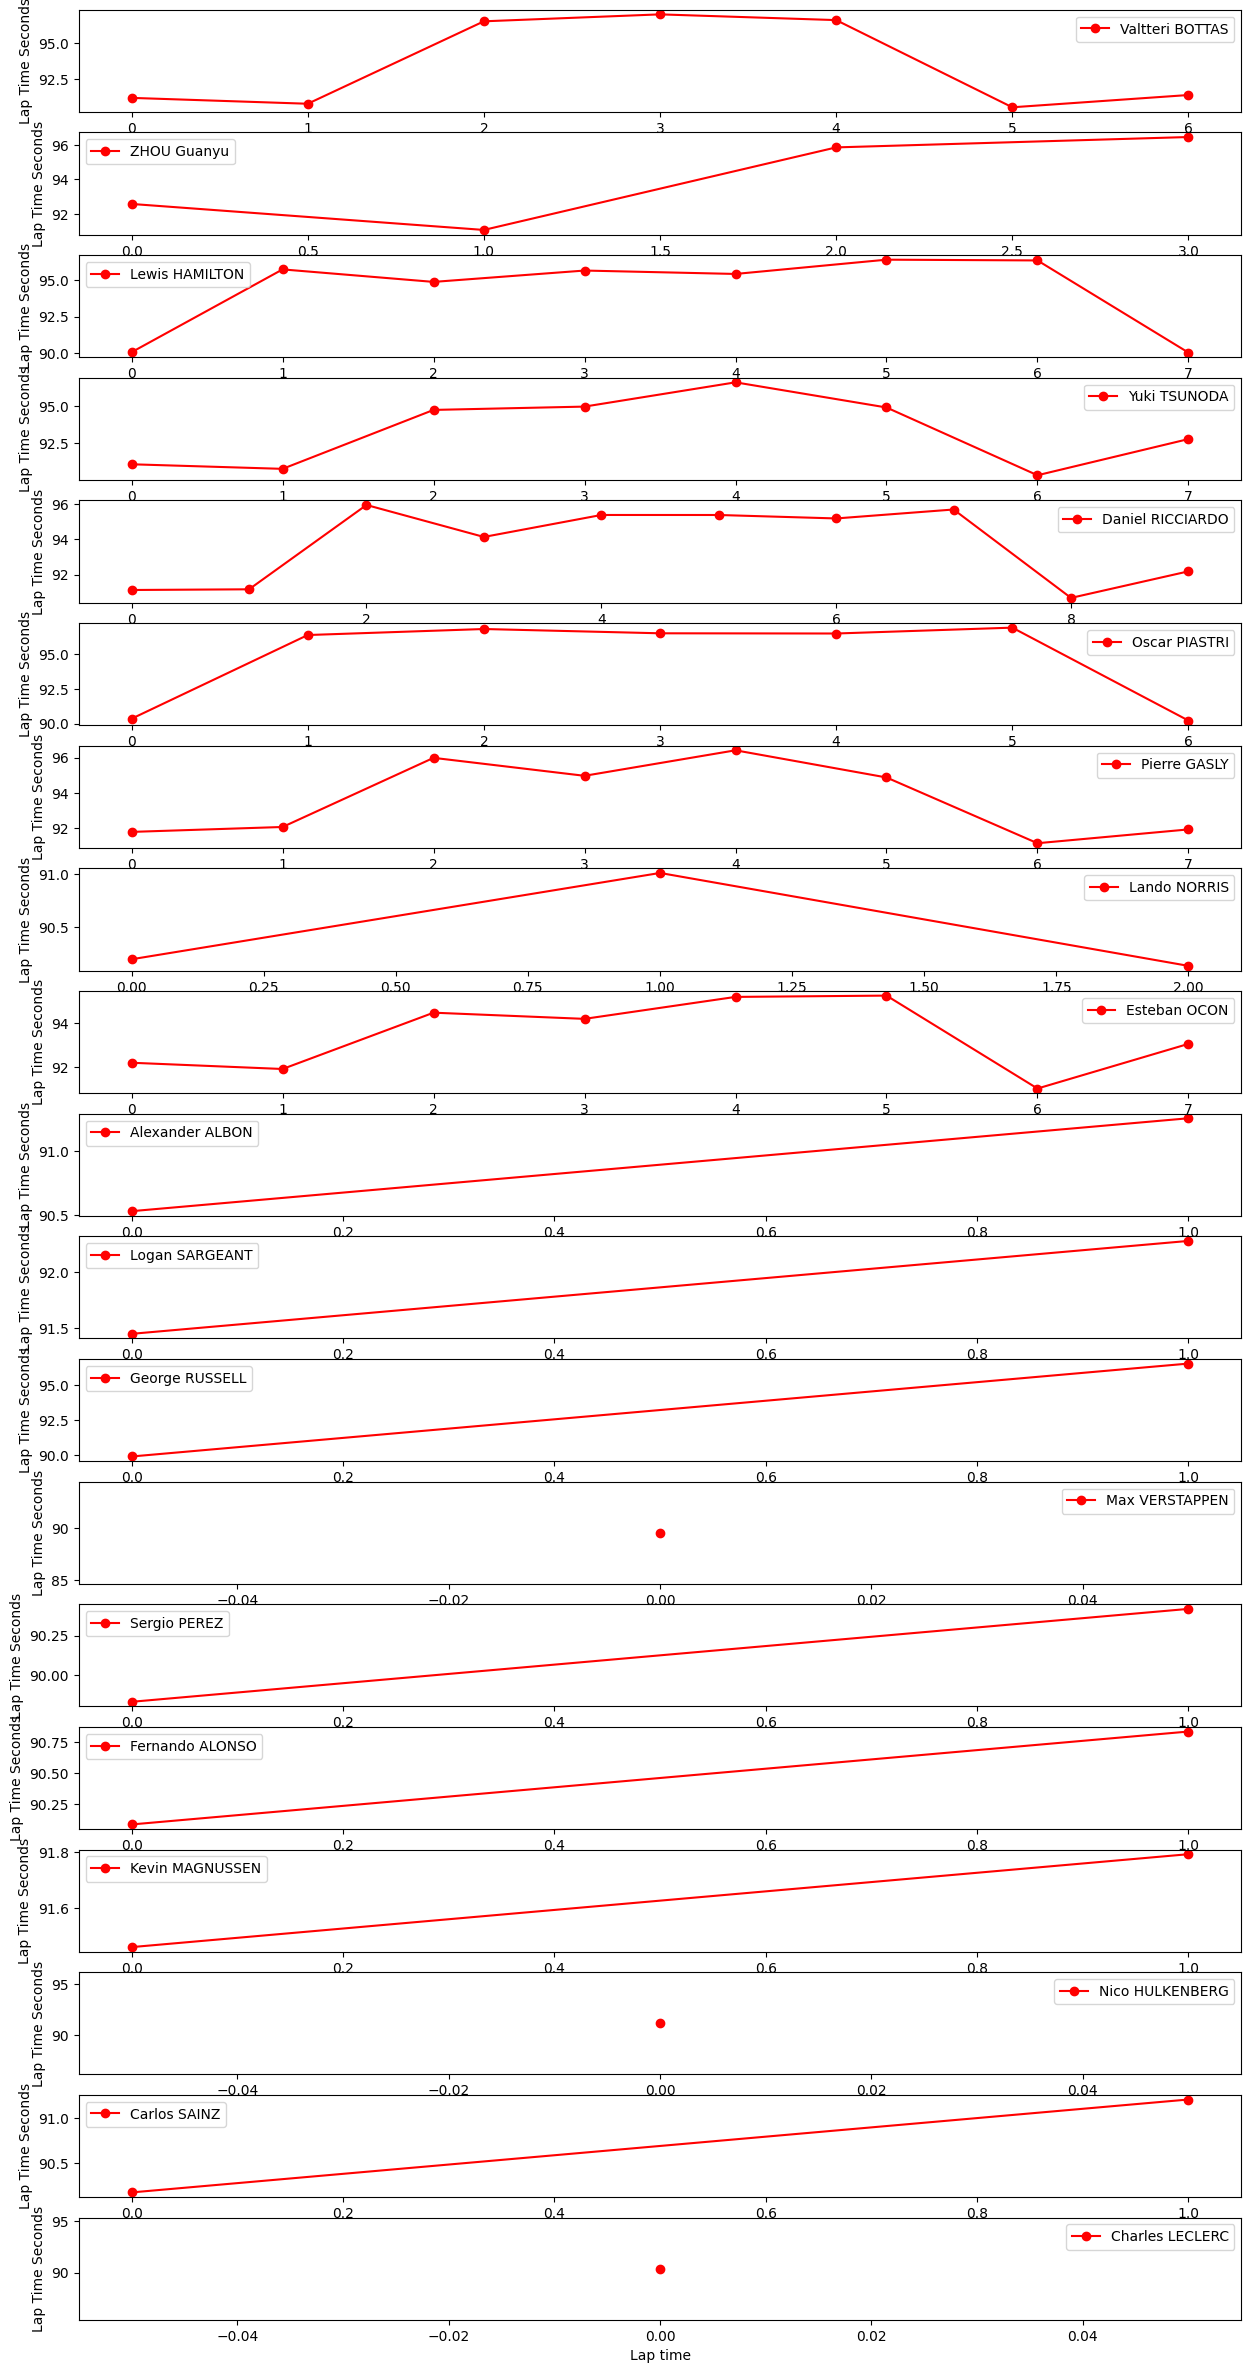

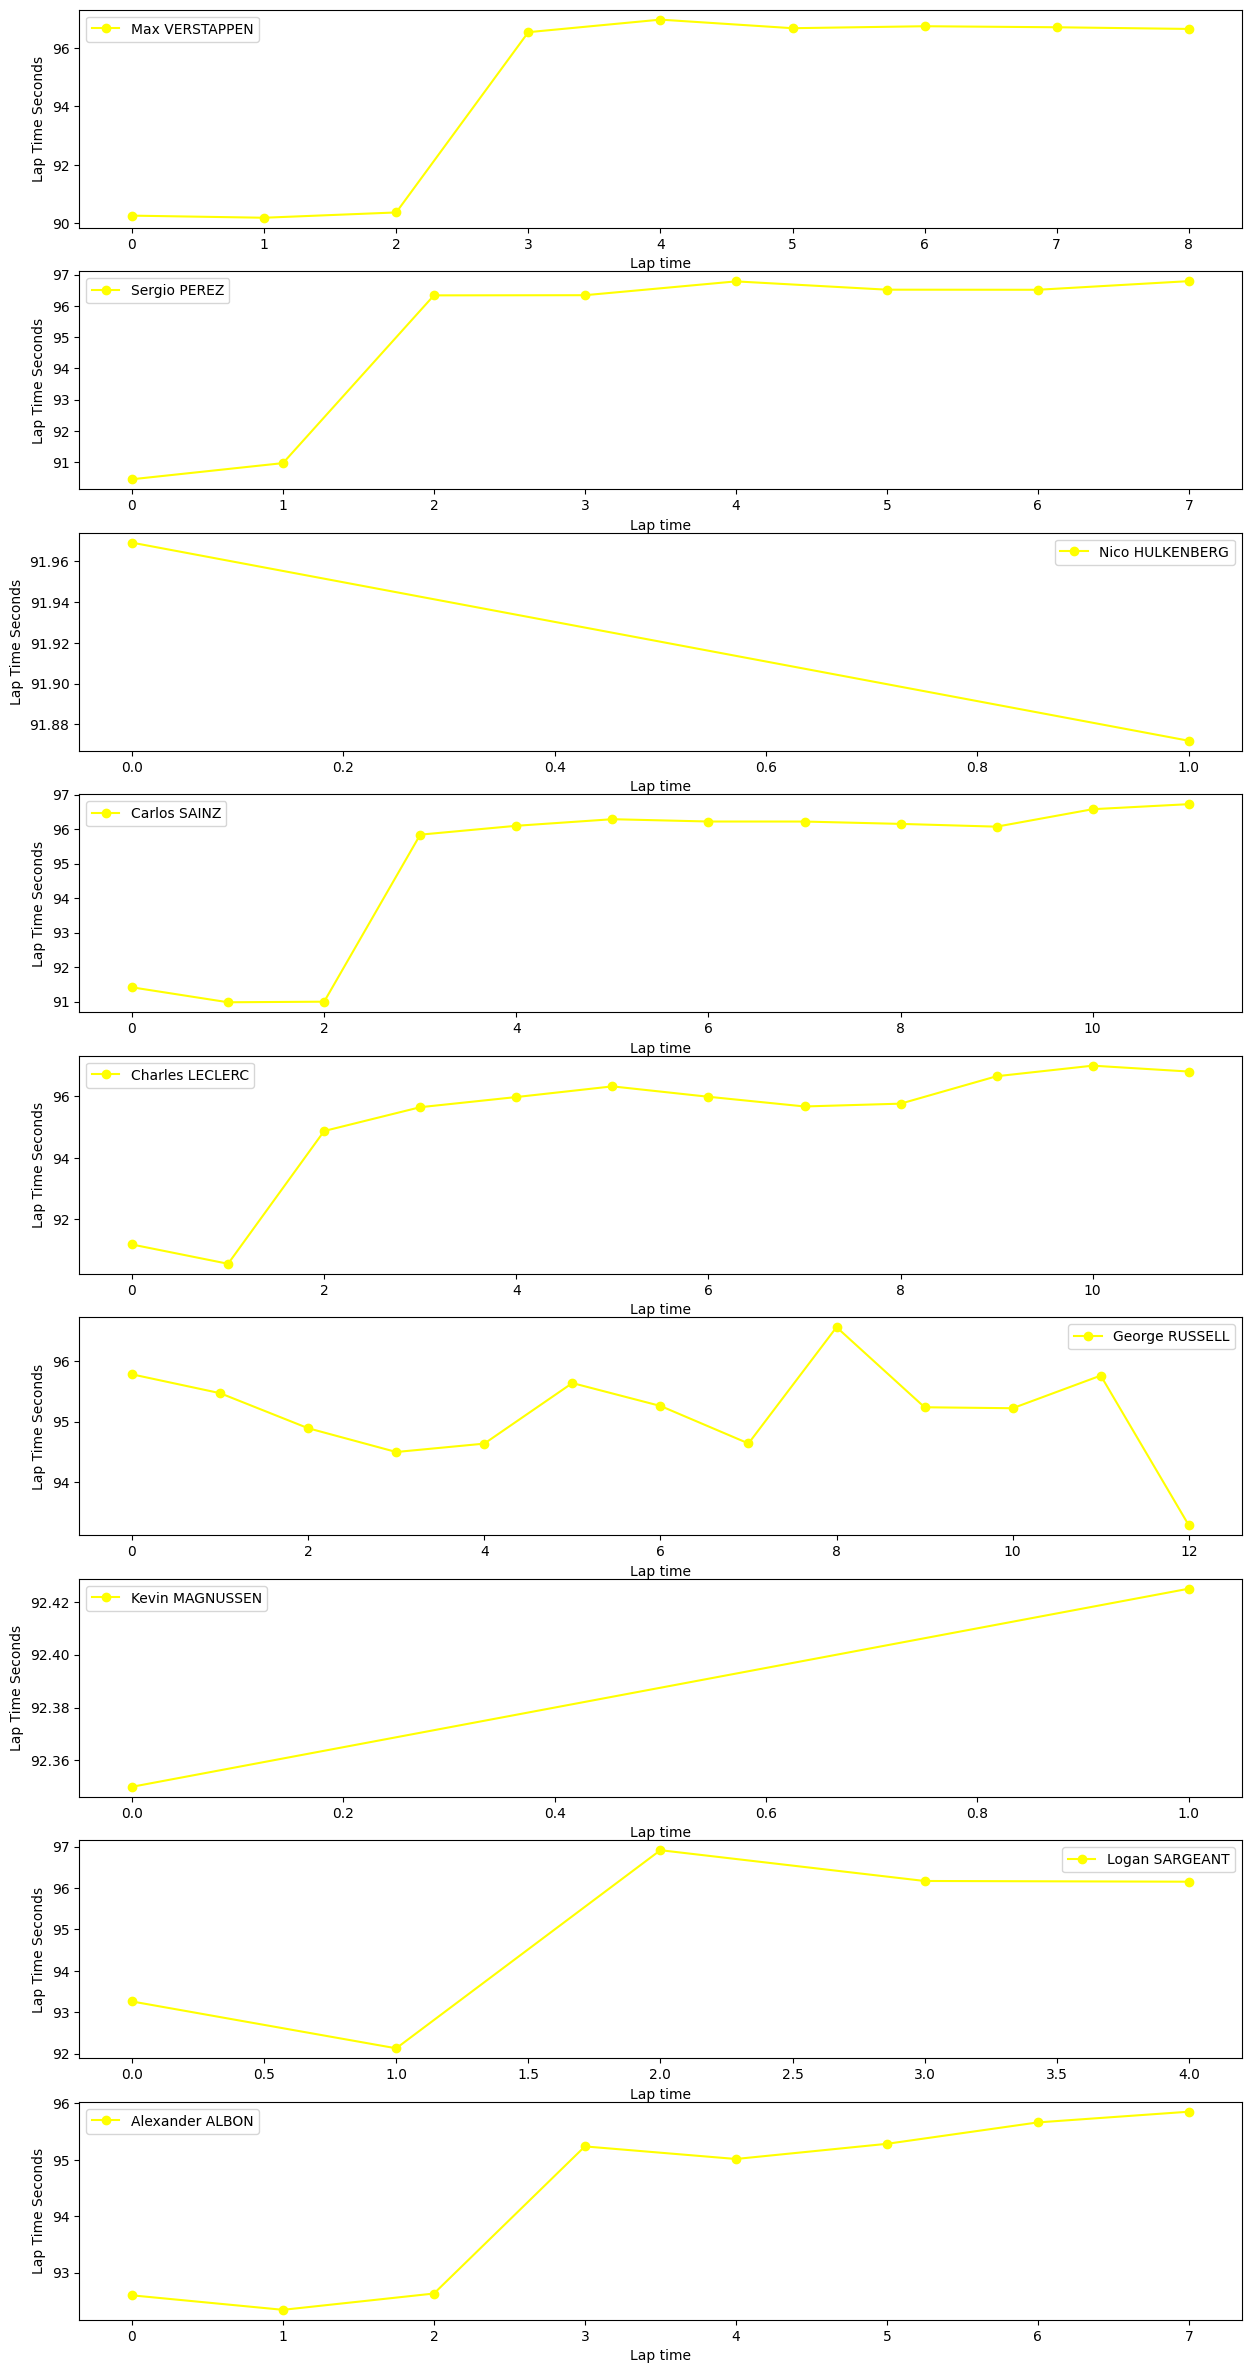

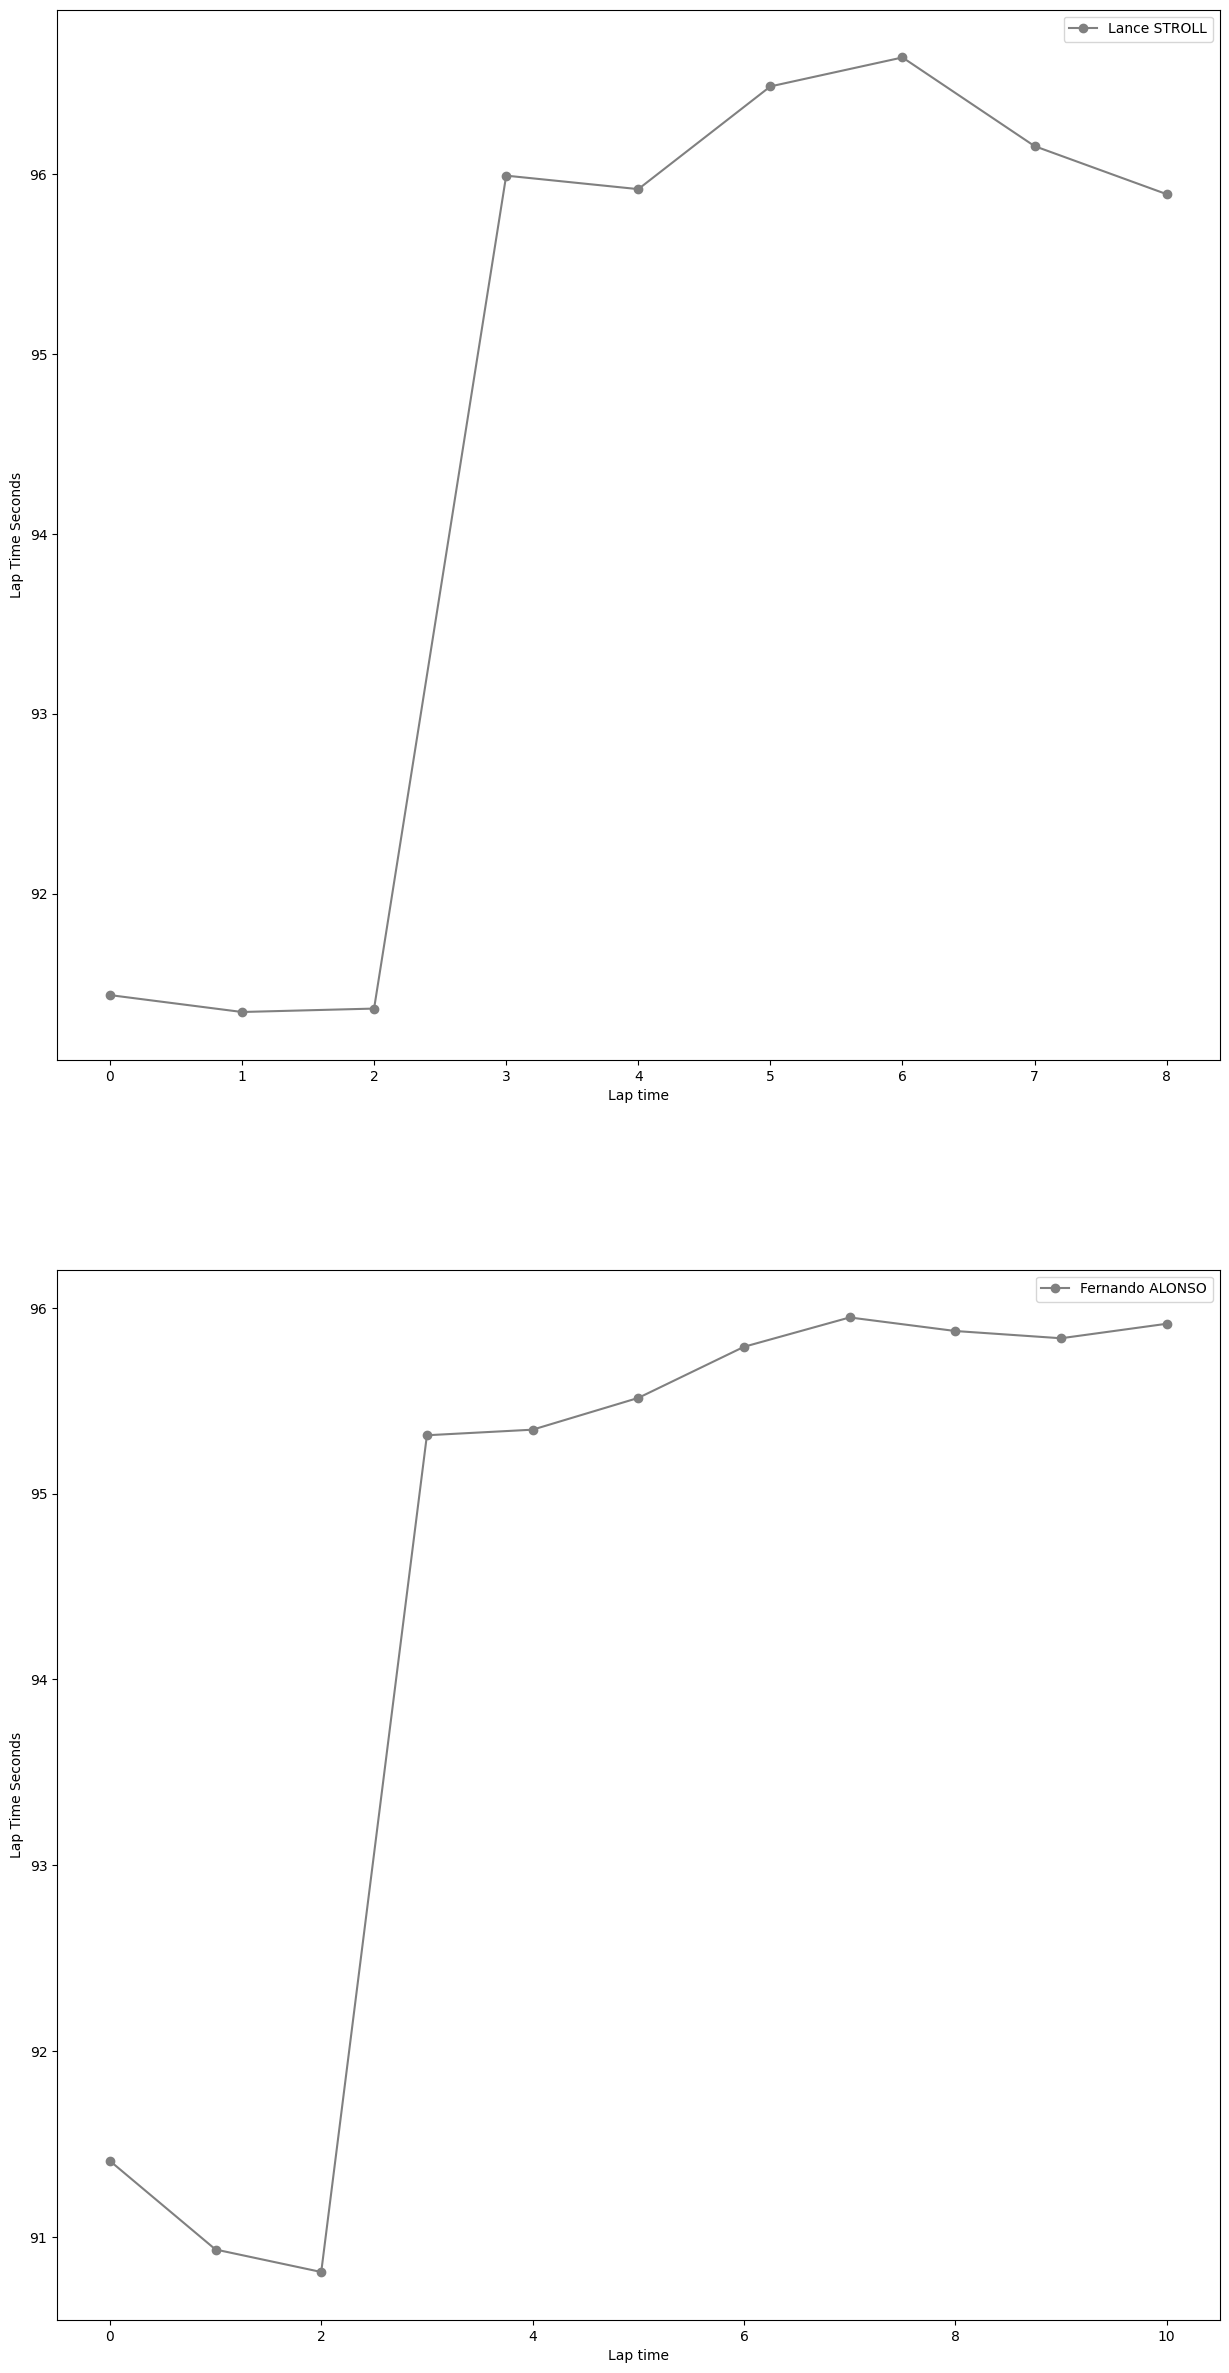

In [324]:
compoundsList = ['SOFT','MEDIUM','HARD']
for compound in compoundsList:
    obtain_data_tyres(jointables,compound,False)

### Top speed analyzed per driver

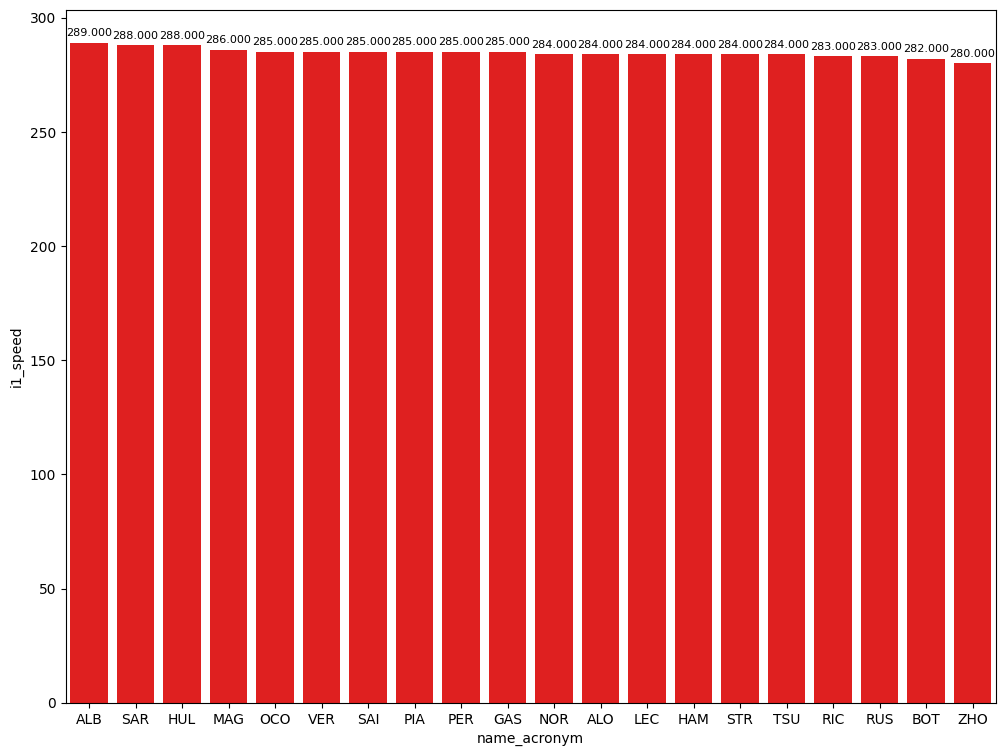

In [325]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
obtainchart("name_acronym","i1_speed",top_speed)

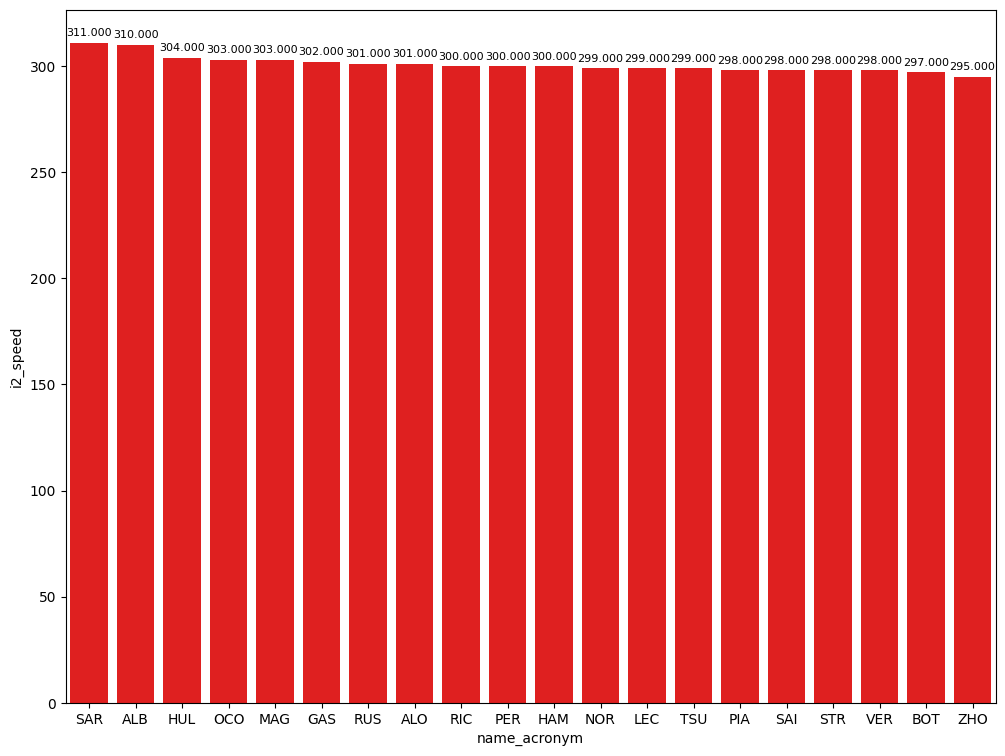

In [326]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
obtainchart("name_acronym","i2_speed",top_speed)

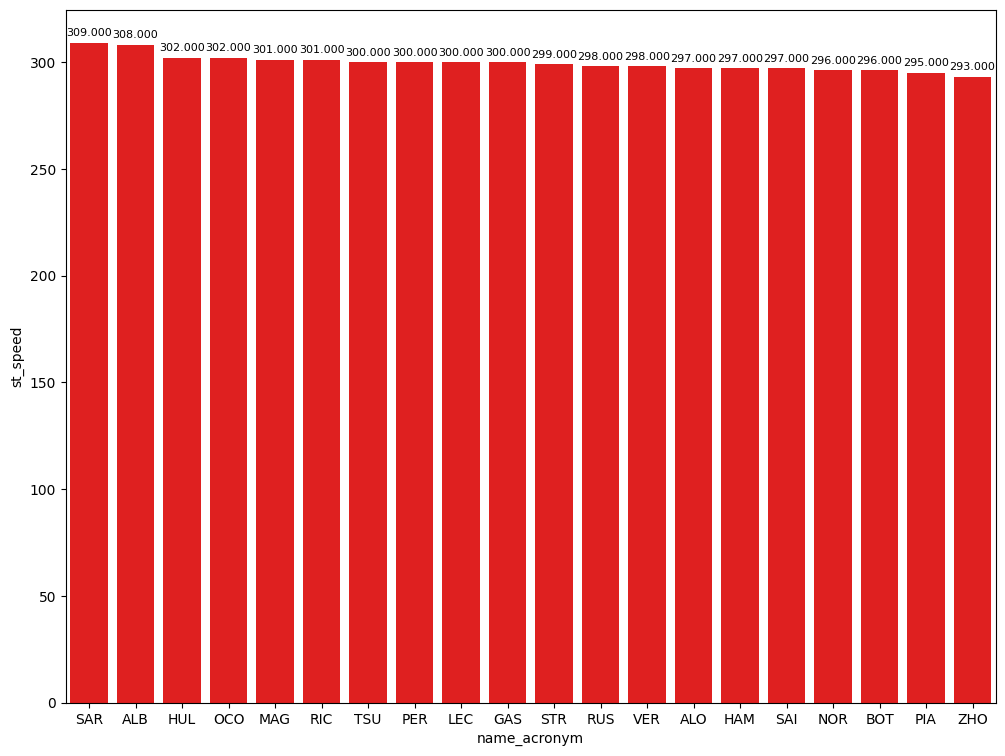

In [327]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
obtainchart("name_acronym","st_speed",top_speed)

### Top speed analyzed per team

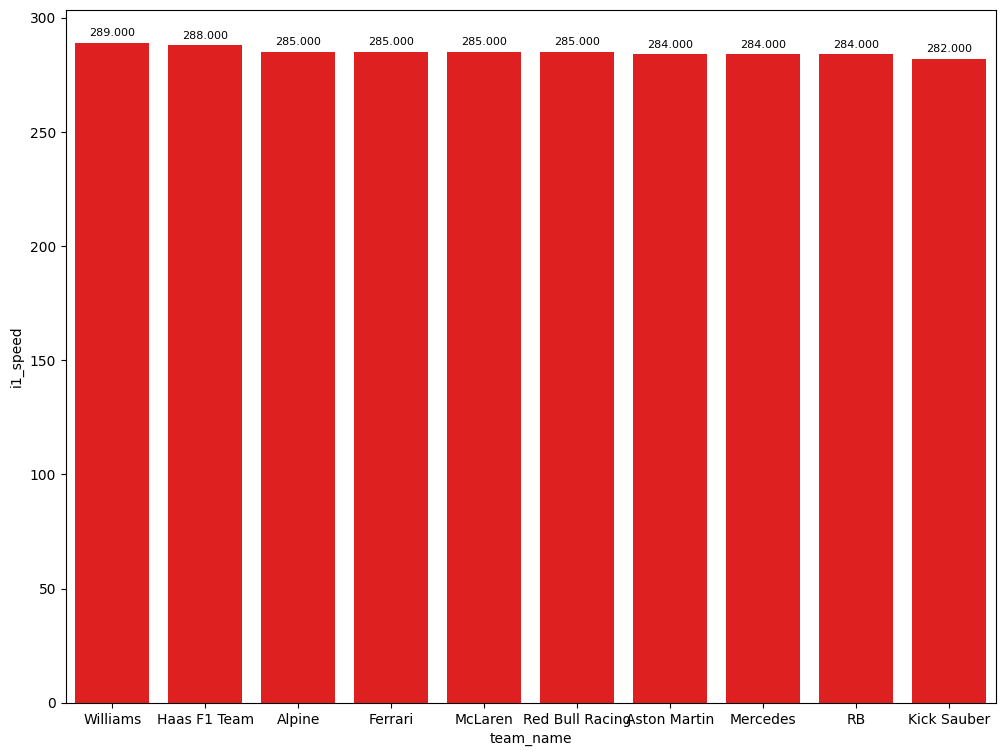

In [328]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
obtainchart("team_name","i1_speed",top_speed)

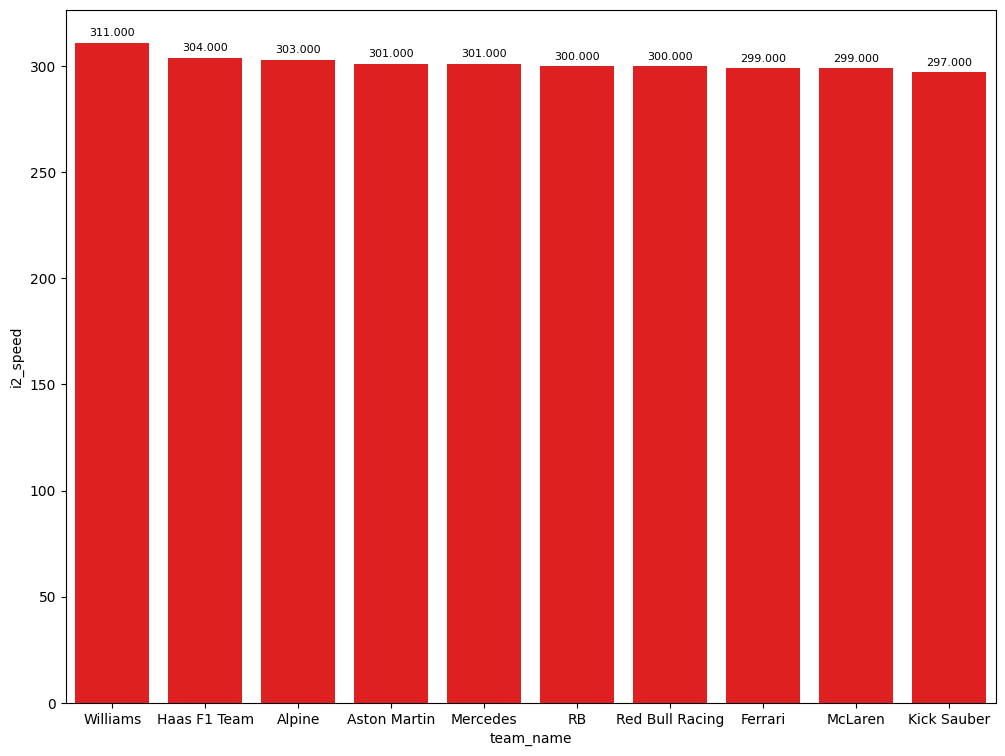

In [329]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
obtainchart("team_name","i2_speed",top_speed)

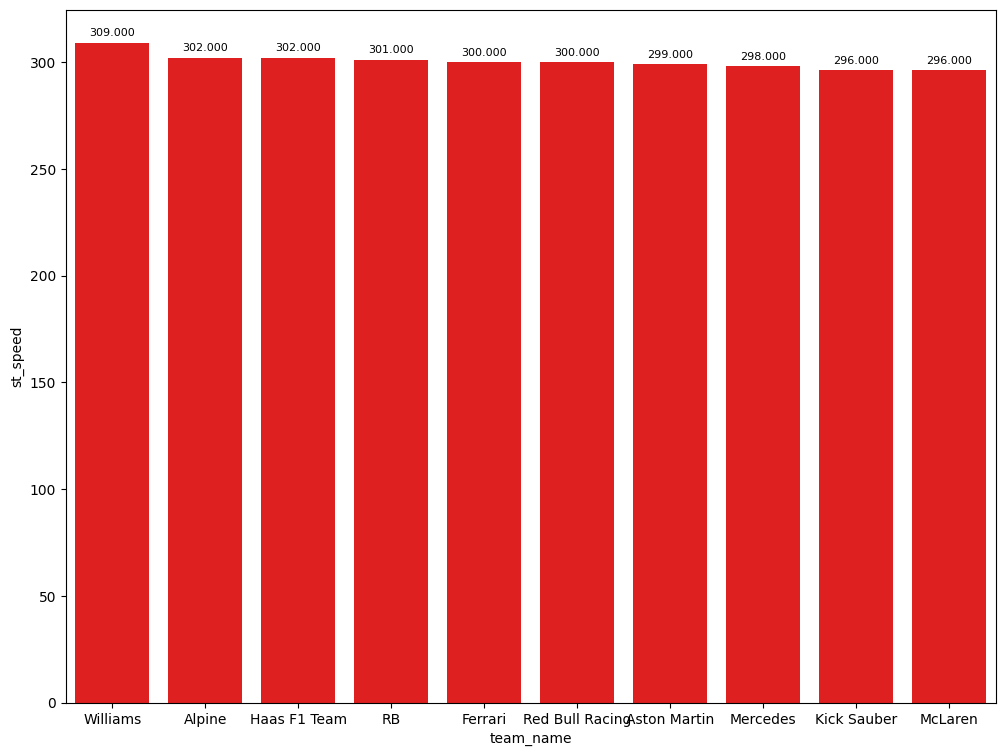

In [330]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
obtainchart("team_name","st_speed",top_speed)

### Fastest lap per compound

In [331]:
compoundsPace = jointables.loc[jointables.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

,full_name,compound,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
94,Fernando ALONSO,HARD,31.925,40.965,17.921,90.811
34,Max VERSTAPPEN,MEDIUM,31.727,40.639,17.827,90.193
316,Max VERSTAPPEN,SOFT,31.458,40.438,17.667,89.563


### Deltas

In [332]:
practiceCleaned = jointables.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =obtain_fastest_lap(driver,practiceCleaned,newdataset)
arr= obtain_deltas(newdataset,[])
newdataset.insert(3,'delta',arr)

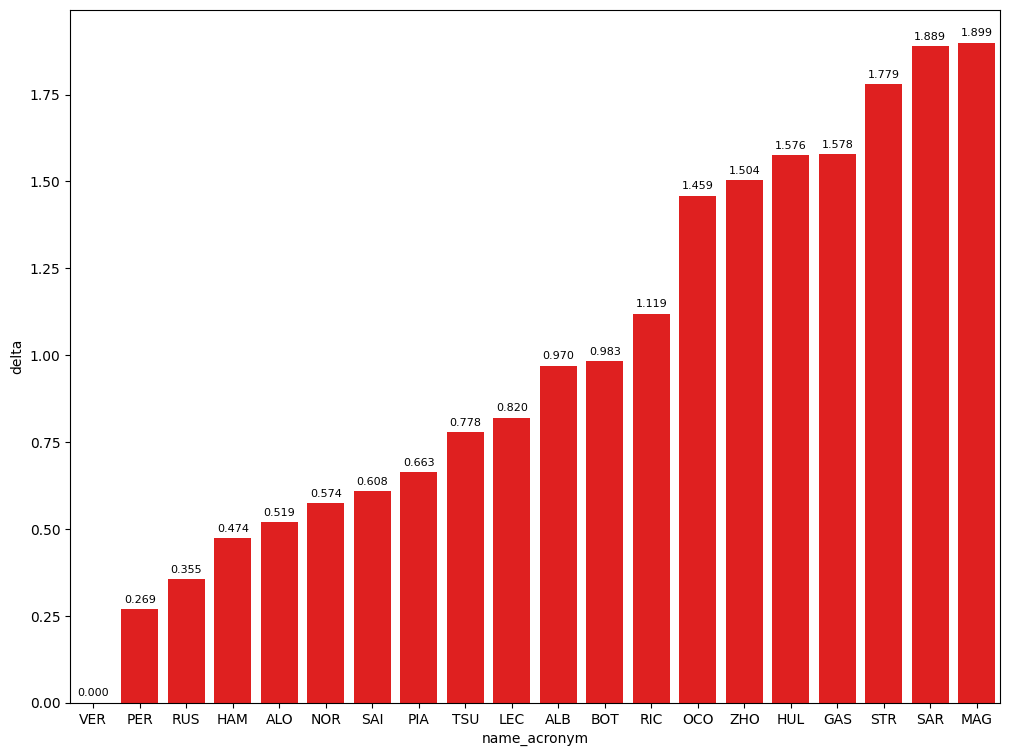

In [333]:
dt = newdataset.sort_values(ascending=True,by='delta')
obtainchart("name_acronym","delta",dt)

### Track dominance

In [334]:
sectorPace = jointables.loc[jointables.groupby(['driver_number'])['duration_sector_1'].idxmin()].sort_values(by=['duration_sector_1'],ascending=True)
sectorPace[['duration_sector_1','full_name','compound','lap_duration','lap_number']]

,duration_sector_1,full_name,compound,lap_duration,lap_number
318,31.323,Lando NORRIS,SOFT,125.669,8
25,31.405,Lewis HAMILTON,SOFT,90.065,2
316,31.458,Max VERSTAPPEN,SOFT,89.563,19
322,31.467,Sergio PEREZ,SOFT,89.832,19
91,31.531,Oscar PIASTRI,SOFT,90.360,2
327,31.663,Fernando ALONSO,SOFT,90.082,20
324,31.686,Yuki TSUNODA,SOFT,90.341,15
346,31.727,Lance STROLL,SOFT,146.445,18
311,31.771,George RUSSELL,SOFT,89.918,19
353,31.818,Carlos SAINZ,SOFT,90.171,22


In [335]:
sectorPace = jointables.loc[jointables.groupby(['team_name'])['duration_sector_1'].idxmin()].sort_values(by=['duration_sector_1'],ascending=True)
sectorPace[['duration_sector_1','team_name','compound','lap_duration','lap_number']]

,duration_sector_1,team_name,compound,lap_duration,lap_number
318,31.323,McLaren,SOFT,125.669,8
25,31.405,Mercedes,SOFT,90.065,2
316,31.458,Red Bull Racing,SOFT,89.563,19
327,31.663,Aston Martin,SOFT,90.082,20
324,31.686,RB,SOFT,90.341,15
353,31.818,Ferrari,SOFT,90.171,22
317,31.888,Kick Sauber,SOFT,90.546,19
321,31.940,Alpine,SOFT,91.141,13
300,32.241,Williams,SOFT,90.533,17
349,32.267,Haas F1 Team,SOFT,91.139,16


In [336]:
sectorPace = jointables.loc[jointables.groupby(['team_name'])['duration_sector_2'].idxmin()].sort_values(by=['duration_sector_2'],ascending=True)
sectorPace[['duration_sector_2','team_name','compound','lap_duration','lap_number']]

,duration_sector_2,team_name,compound,lap_duration,lap_number
311,40.318,Mercedes,SOFT,89.918,19
316,40.438,Red Bull Racing,SOFT,89.563,19
353,40.473,Ferrari,SOFT,90.171,22
327,40.597,Aston Martin,SOFT,90.082,20
300,40.632,Williams,SOFT,90.533,17
109,40.640,McLaren,SOFT,90.199,2
324,40.774,RB,SOFT,90.341,15
317,40.826,Kick Sauber,SOFT,90.546,19
345,40.924,Alpine,SOFT,91.022,13
347,41.022,Haas F1 Team,SOFT,91.462,17


In [337]:
sectorPace = jointables.loc[jointables.groupby(['driver_number'])['duration_sector_2'].idxmin()].sort_values(by=['duration_sector_2'],ascending=True)
sectorPace[['duration_sector_2','full_name','compound','lap_duration','lap_number']]

,duration_sector_2,full_name,compound,lap_duration,lap_number
311,40.318,George RUSSELL,SOFT,89.918,19
316,40.438,Max VERSTAPPEN,SOFT,89.563,19
353,40.473,Carlos SAINZ,SOFT,90.171,22
322,40.529,Sergio PEREZ,SOFT,89.832,19
355,40.544,Charles LECLERC,SOFT,90.383,21
327,40.597,Fernando ALONSO,SOFT,90.082,20
319,40.631,Lewis HAMILTON,SOFT,90.037,17
300,40.632,Alexander ALBON,SOFT,90.533,17
109,40.640,Lando NORRIS,SOFT,90.199,2
326,40.717,Oscar PIASTRI,SOFT,90.226,15


In [338]:
sectorPace = jointables.loc[jointables.groupby(['driver_number'])['duration_sector_3'].idxmin()].sort_values(by=['duration_sector_3'],ascending=True)
sectorPace[['duration_sector_3','full_name','compound','lap_duration','lap_number']]

,duration_sector_3,full_name,compound,lap_duration,lap_number
300,17.660,Alexander ALBON,SOFT,90.533,17
316,17.667,Max VERSTAPPEN,SOFT,89.563,19
323,17.786,Daniel RICCIARDO,SOFT,90.682,18
349,17.812,Nico HULKENBERG,SOFT,91.139,16
319,17.820,Lewis HAMILTON,SOFT,90.037,17
327,17.822,Fernando ALONSO,SOFT,90.082,20
311,17.829,George RUSSELL,SOFT,89.918,19
317,17.832,Valtteri BOTTAS,SOFT,90.546,19
322,17.836,Sergio PEREZ,SOFT,89.832,19
302,17.842,Logan SARGEANT,SOFT,91.452,14


In [339]:
sectorPace = jointables.loc[jointables.groupby(['team_name'])['duration_sector_3'].idxmin()].sort_values(by=['duration_sector_3'],ascending=True)
sectorPace[['duration_sector_3','team_name','compound','lap_duration','lap_number']]

,duration_sector_3,team_name,compound,lap_duration,lap_number
300,17.660,Williams,SOFT,90.533,17
316,17.667,Red Bull Racing,SOFT,89.563,19
323,17.786,RB,SOFT,90.682,18
349,17.812,Haas F1 Team,SOFT,91.139,16
319,17.820,Mercedes,SOFT,90.037,17
327,17.822,Aston Martin,SOFT,90.082,20
317,17.832,Kick Sauber,SOFT,90.546,19
326,17.862,McLaren,SOFT,90.226,15
398,17.878,Ferrari,SOFT,91.210,25
369,18.112,Alpine,SOFT,91.924,16


### Race pace per teams

In [340]:
def getinfolonglaps(dataset,driver_number,team):
    dataset = dataset.query("is_pit_out_lap == False and driver_number == @driver_number and team_name == @team and lap_duration < 100 and lap_duration >94 ")
    return dataset[['full_name','compound','date_start','lap_number','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

#### Red Bull Racing

In [341]:
stintInformation.query('driver_number == 1 or driver_number == 11')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
6,1232,9491,1,1,1,6,MEDIUM,0
13,1232,9491,1,11,1,8,MEDIUM,0
26,1232,9491,2,1,7,9,MEDIUM,5
38,1232,9491,2,11,9,18,MEDIUM,7
42,1232,9491,3,1,10,18,MEDIUM,8
62,1232,9491,4,1,19,21,SOFT,0
66,1232,9491,3,11,19,26,SOFT,0
72,1232,9491,5,1,22,24,SOFT,3


In [342]:
getinfolonglaps(jointables,1,'Red Bull Racing')

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
152,Max VERSTAPPEN,MEDIUM,2024-04-06T02:53:57.279000,10,34.635,43.163,18.737,96.535
168,Max VERSTAPPEN,MEDIUM,2024-04-06T02:55:33.861000,11,34.725,43.448,18.791,96.964
183,Max VERSTAPPEN,MEDIUM,2024-04-06T02:57:10.741000,12,34.879,43.227,18.565,96.671
200,Max VERSTAPPEN,MEDIUM,2024-04-06T02:58:47.523000,13,34.902,43.253,18.583,96.738
219,Max VERSTAPPEN,MEDIUM,2024-04-06T03:00:24.124000,14,34.808,43.327,18.568,96.703
238,Max VERSTAPPEN,MEDIUM,2024-04-06T03:02:00.948000,15,35.040,43.716,18.643,97.399
255,Max VERSTAPPEN,MEDIUM,2024-04-06T03:03:38.273000,16,34.914,43.215,18.517,96.646


In [343]:
getinfolonglaps(jointables,11,'Red Bull Racing')

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
78,Sergio PEREZ,MEDIUM,2024-04-06T02:41:54.114000,7,31.988,42.832,23.183,98.003
149,Sergio PEREZ,MEDIUM,2024-04-06T02:53:35.740000,9,34.608,43.024,18.701,96.333
163,Sergio PEREZ,MEDIUM,2024-04-06T02:55:12.208000,10,34.499,43.171,18.668,96.338
179,Sergio PEREZ,MEDIUM,2024-04-06T02:56:48.483000,11,34.696,43.290,18.794,96.780
196,Sergio PEREZ,MEDIUM,2024-04-06T02:58:25.301000,12,34.707,43.122,18.686,96.515
215,Sergio PEREZ,MEDIUM,2024-04-06T03:00:01.822000,13,34.640,43.199,18.673,96.512
234,Sergio PEREZ,MEDIUM,2024-04-06T03:01:38.349000,14,34.749,43.261,18.778,96.788
251,Sergio PEREZ,MEDIUM,2024-04-06T03:03:15.128000,15,34.979,43.331,18.693,97.003
266,Sergio PEREZ,MEDIUM,2024-04-06T03:04:52.916000,16,35.018,43.241,18.961,97.220


#### Ferrari

In [344]:
stintInformation.query('driver_number == 16 or driver_number == 55')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
9,1232,9491,1,16,1,7,MEDIUM,0
16,1232,9491,1,55,1,8,MEDIUM,0
35,1232,9491,2,16,8,20,MEDIUM,6
40,1232,9491,2,55,9,21,MEDIUM,7
71,1232,9491,3,16,21,26,SOFT,0
74,1232,9491,3,55,22,28,SOFT,0


In [345]:
getinfolonglaps(jointables,16,'Ferrari')

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
76,Charles LECLERC,MEDIUM,2024-04-06T02:41:24.108000,6,31.926,40.626,22.322,94.874
128,Charles LECLERC,MEDIUM,2024-04-06T02:50:47.326000,8,34.173,42.802,18.673,95.648
140,Charles LECLERC,MEDIUM,2024-04-06T02:52:22.914000,9,34.417,42.813,18.748,95.978
169,Charles LECLERC,MEDIUM,2024-04-06T02:55:40.138000,11,34.566,43.091,18.668,96.325
184,Charles LECLERC,MEDIUM,2024-04-06T02:57:16.445000,12,34.457,42.892,18.638,95.987
201,Charles LECLERC,MEDIUM,2024-04-06T02:58:52.604000,13,34.408,42.772,18.492,95.672
220,Charles LECLERC,MEDIUM,2024-04-06T03:00:28.155000,14,34.420,42.788,18.555,95.763
256,Charles LECLERC,MEDIUM,2024-04-06T03:03:46.111000,16,34.830,43.094,18.731,96.655
271,Charles LECLERC,MEDIUM,2024-04-06T03:05:22.798000,17,35.061,43.222,18.715,96.998
282,Charles LECLERC,MEDIUM,2024-04-06T03:06:59.828000,18,35.023,43.214,18.570,96.807


In [346]:
getinfolonglaps(jointables,55,'Ferrari')

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
150,Carlos SAINZ,MEDIUM,2024-04-06T02:53:43.498000,9,34.415,42.834,18.592,95.841
165,Carlos SAINZ,MEDIUM,2024-04-06T02:55:19.349000,10,34.528,43.083,18.487,96.098
180,Carlos SAINZ,MEDIUM,2024-04-06T02:56:55.383000,11,34.716,43.090,18.483,96.289
197,Carlos SAINZ,MEDIUM,2024-04-06T02:58:31.675000,12,34.566,43.092,18.564,96.222
216,Carlos SAINZ,MEDIUM,2024-04-06T03:00:07.957000,13,34.564,43.086,18.571,96.221
253,Carlos SAINZ,MEDIUM,2024-04-06T03:03:25.061000,15,34.620,43.073,18.460,96.153
268,Carlos SAINZ,MEDIUM,2024-04-06T03:05:01.269000,16,34.660,42.944,18.469,96.073
280,Carlos SAINZ,MEDIUM,2024-04-06T03:06:37.301000,17,34.821,43.269,18.489,96.579
293,Carlos SAINZ,MEDIUM,2024-04-06T03:09:55.483000,19,34.930,43.261,18.534,96.725
296,Carlos SAINZ,MEDIUM,2024-04-06T03:11:32.175000,20,35.010,43.295,20.888,99.193


#### Mercedes

In [347]:
stintInformation.query('driver_number == 63 or driver_number == 44')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
3,1232,9491,1,44,1,4,SOFT,0
19,1232,9491,1,63,1,15,MEDIUM,0
21,1232,9491,2,44,5,6,SOFT,3
28,1232,9491,3,44,7,16,SOFT,5
53,1232,9491,2,63,16,18,MEDIUM,14
57,1232,9491,4,44,17,19,SOFT,0
64,1232,9491,3,63,19,21,SOFT,0
68,1232,9491,5,44,20,22,SOFT,0
73,1232,9491,4,63,22,25,SOFT,3


In [348]:
getinfolonglaps(jointables,63,'Mercedes')

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
19,George RUSSELL,MEDIUM,2024-04-06T02:33:03.963000,2,34.438,42.657,18.691,95.786
29,George RUSSELL,MEDIUM,2024-04-06T02:34:39.662000,3,34.278,42.553,18.642,95.473
36,George RUSSELL,MEDIUM,2024-04-06T02:36:15.046000,4,33.801,42.708,18.382,94.891
47,George RUSSELL,MEDIUM,2024-04-06T02:37:49.941000,5,33.745,42.303,18.448,94.496
62,George RUSSELL,MEDIUM,2024-04-06T02:39:24.511000,6,33.804,42.368,18.463,94.635
74,George RUSSELL,MEDIUM,2024-04-06T02:40:59.218000,7,34.118,42.867,18.656,95.641
85,George RUSSELL,MEDIUM,2024-04-06T02:42:34.894000,8,34.193,42.503,18.565,95.261
90,George RUSSELL,MEDIUM,2024-04-06T02:44:10.189000,9,33.793,42.404,18.441,94.638
101,George RUSSELL,MEDIUM,2024-04-06T02:45:44.681000,10,35.314,42.732,18.523,96.569
110,George RUSSELL,MEDIUM,2024-04-06T02:47:21.435000,11,33.900,42.591,18.748,95.239


In [349]:
getinfolonglaps(jointables,44,'Mercedes')

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
77,Lewis HAMILTON,SOFT,2024-04-06T02:41:30.022000,5,32.650,42.299,20.790,95.739
141,Lewis HAMILTON,SOFT,2024-04-06T02:52:30.748000,7,34.015,42.455,18.412,94.882
154,Lewis HAMILTON,SOFT,2024-04-06T02:54:05.676000,8,34.243,42.810,18.607,95.660
185,Lewis HAMILTON,SOFT,2024-04-06T02:57:22.755000,10,34.016,42.773,18.638,95.427
202,Lewis HAMILTON,SOFT,2024-04-06T02:58:58.193000,11,34.477,43.256,18.672,96.405
221,Lewis HAMILTON,SOFT,2024-04-06T03:00:34.657000,12,34.405,43.275,18.673,96.353
240,Lewis HAMILTON,SOFT,2024-04-06T03:02:10.982000,13,34.820,43.616,21.343,99.779
257,Lewis HAMILTON,SOFT,2024-04-06T03:03:50.680000,14,34.937,43.547,18.700,97.184


#### Aston Martin

In [350]:
stintInformation.query('driver_number == 14 or driver_number == 18')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
14,1232,9491,1,14,1,8,HARD,0
15,1232,9491,1,18,1,8,HARD,0
37,1232,9491,2,18,9,17,HARD,7
39,1232,9491,2,14,9,19,HARD,7
60,1232,9491,3,18,18,24,SOFT,0
70,1232,9491,3,14,20,25,SOFT,0


In [351]:
getinfolonglaps(jointables,14,'Aston Martin')

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
182,Fernando ALONSO,HARD,2024-04-06T02:57:06.246000,9,34.161,42.635,18.518,95.314
199,Fernando ALONSO,HARD,2024-04-06T02:58:41.624000,10,34.430,42.500,18.414,95.344
218,Fernando ALONSO,HARD,2024-04-06T03:00:16.924000,11,34.347,42.744,18.424,95.515
237,Fernando ALONSO,HARD,2024-04-06T03:01:52.531000,12,34.390,42.907,18.493,95.790
269,Fernando ALONSO,HARD,2024-04-06T03:05:11.812000,14,34.573,42.914,18.461,95.948
281,Fernando ALONSO,HARD,2024-04-06T03:06:47.672000,15,34.420,42.921,18.534,95.875
288,Fernando ALONSO,HARD,2024-04-06T03:08:23.676000,16,34.552,42.759,18.525,95.836
294,Fernando ALONSO,HARD,2024-04-06T03:09:59.390000,17,34.555,42.948,18.411,95.914


In [352]:
getinfolonglaps(jointables,18,'Aston Martin')

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
210,Lance STROLL,HARD,2024-04-06T02:59:33.872000,9,34.501,42.948,18.542,95.991
227,Lance STROLL,HARD,2024-04-06T03:01:09.954000,10,34.576,42.792,18.548,95.916
246,Lance STROLL,HARD,2024-04-06T03:02:45.730000,11,34.845,42.807,18.835,96.487
276,Lance STROLL,HARD,2024-04-06T03:06:04.525000,13,34.795,43.053,18.800,96.648
284,Lance STROLL,HARD,2024-04-06T03:07:41.157000,14,34.691,42.904,18.560,96.155
291,Lance STROLL,HARD,2024-04-06T03:09:17.204000,15,34.457,42.896,18.535,95.888


#### McLaren

In [353]:
stintInformation.query('driver_number == 4 or driver_number == 81')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
1,1232,9491,1,4,1,4,SOFT,0
5,1232,9491,1,81,1,4,SOFT,0
22,1232,9491,2,4,5,7,SOFT,3
25,1232,9491,2,81,5,14,SOFT,3
29,1232,9491,3,4,8,12,SOFT,0
46,1232,9491,4,4,13,15,SOFT,0
51,1232,9491,3,81,15,17,SOFT,0
59,1232,9491,4,81,18,20,SOFT,13


In [354]:
getinfolonglaps(jointables,81,'McLaren')

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
159,Oscar PIASTRI,SOFT,2024-04-06T02:54:55.106000,5,34.733,43.045,18.620,96.398
175,Oscar PIASTRI,SOFT,2024-04-06T02:56:31.544000,6,34.884,43.116,18.832,96.832
192,Oscar PIASTRI,SOFT,2024-04-06T02:58:08.401000,7,34.737,43.140,18.646,96.523
211,Oscar PIASTRI,SOFT,2024-04-06T02:59:44.772000,8,34.737,43.060,18.711,96.508
229,Oscar PIASTRI,SOFT,2024-04-06T03:01:21.325000,9,34.872,43.371,18.688,96.931
248,Oscar PIASTRI,SOFT,2024-04-06T03:02:58.341000,10,35.158,44.662,19.193,99.013
263,Oscar PIASTRI,SOFT,2024-04-06T03:04:37.397000,11,35.157,43.702,18.872,97.731
277,Oscar PIASTRI,SOFT,2024-04-06T03:06:15.041000,12,35.253,43.782,18.866,97.901


#### RB

In [355]:
stintInformation.query('driver_number == 3 or driver_number == 22')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
11,1232,9491,1,22,1,7,SOFT,0
12,1232,9491,1,3,1,8,SOFT,0
31,1232,9491,2,22,8,13,SOFT,6
36,1232,9491,2,3,9,10,SOFT,0
43,1232,9491,3,3,11,17,SOFT,9
49,1232,9491,3,22,14,14,SOFT,12
52,1232,9491,4,22,15,22,SOFT,0
61,1232,9491,4,3,18,25,SOFT,0


In [356]:
getinfolonglaps(jointables,3,'RB')

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
156,Daniel RICCIARDO,SOFT,2024-04-06T02:54:21.949000,9,32.452,41.558,21.919,95.929
224,Daniel RICCIARDO,SOFT,2024-04-06T03:00:52.631000,11,33.601,42.127,18.396,94.124
243,Daniel RICCIARDO,SOFT,2024-04-06T03:02:26.807000,12,33.923,42.951,18.491,95.365
260,Daniel RICCIARDO,SOFT,2024-04-06T03:04:02.171000,13,34.267,42.704,18.393,95.364
273,Daniel RICCIARDO,SOFT,2024-04-06T03:05:37.571000,14,34.057,42.584,18.528,95.169
283,Daniel RICCIARDO,SOFT,2024-04-06T03:07:12.828000,15,34.328,42.801,18.545,95.674
290,Daniel RICCIARDO,SOFT,2024-04-06T03:08:48.439000,16,34.704,43.206,21.164,99.074


In [357]:
getinfolonglaps(jointables,22,'RB')

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
188,Yuki TSUNODA,SOFT,2024-04-06T02:57:36.757000,8,33.851,42.383,18.495,94.729
206,Yuki TSUNODA,SOFT,2024-04-06T02:59:11.526000,9,33.723,42.668,18.561,94.952
223,Yuki TSUNODA,SOFT,2024-04-06T03:00:46.466000,10,34.223,43.398,18.961,96.582
242,Yuki TSUNODA,SOFT,2024-04-06T03:02:23.033000,11,33.753,42.609,18.531,94.893
258,Yuki TSUNODA,SOFT,2024-04-06T03:03:57.885000,12,34.146,42.703,20.439,97.288


#### Williams

In [358]:
stintInformation.query('driver_number == 2 or driver_number == 23')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
0,1232,9491,1,23,1,2,HARD,0
8,1232,9491,1,2,1,7,MEDIUM,0
20,1232,9491,2,23,3,9,MEDIUM,0
30,1232,9491,2,2,8,13,MEDIUM,6
41,1232,9491,3,23,10,16,MEDIUM,0
50,1232,9491,3,2,14,18,SOFT,0
56,1232,9491,4,23,17,19,SOFT,0
63,1232,9491,4,2,19,21,SOFT,5
69,1232,9491,5,23,20,24,SOFT,0


In [359]:
getinfolonglaps(jointables,2,'Williams')

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
252,Logan SARGEANT,MEDIUM,2024-04-06T03:03:18.085000,8,34.992,43.062,18.859,96.913
267,Logan SARGEANT,MEDIUM,2024-04-06T03:04:55.040000,9,34.931,43.027,21.695,99.653
279,Logan SARGEANT,MEDIUM,2024-04-06T03:06:34.738000,10,34.812,42.820,18.537,96.169
286,Logan SARGEANT,MEDIUM,2024-04-06T03:08:10.800000,11,34.768,42.900,18.484,96.152
292,Logan SARGEANT,MEDIUM,2024-04-06T03:09:46.974000,12,34.764,43.564,21.508,99.836


In [360]:
getinfolonglaps(jointables,23,'Williams')

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
162,Alexander ALBON,MEDIUM,2024-04-06T02:55:08.856000,10,34.332,42.627,18.279,95.238
178,Alexander ALBON,MEDIUM,2024-04-06T02:56:43.981000,11,34.220,42.380,18.415,95.015
195,Alexander ALBON,MEDIUM,2024-04-06T02:58:19.069000,12,34.240,42.440,18.604,95.284
214,Alexander ALBON,MEDIUM,2024-04-06T02:59:54.350000,13,34.349,42.628,18.687,95.664
232,Alexander ALBON,MEDIUM,2024-04-06T03:01:30.104000,14,34.433,42.985,18.436,95.854
249,Alexander ALBON,MEDIUM,2024-04-06T03:03:05.877000,15,34.695,42.904,21.513,99.112


#### Kick Sauber

In [361]:
stintInformation.query('driver_number == 24 or driver_number == 77')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
2,1232,9491,1,24,1,4,SOFT,0
4,1232,9491,1,77,1,4,SOFT,0
23,1232,9491,2,24,5,7,SOFT,3
24,1232,9491,2,77,5,7,SOFT,3
33,1232,9491,3,24,8,17,SOFT,0
34,1232,9491,3,77,8,18,SOFT,6
65,1232,9491,4,77,19,24,SOFT,0
75,1232,9491,5,77,25,27,SOFT,0


In [362]:
getinfolonglaps(jointables,24,'Kick Sauber')

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
143,ZHOU Guanyu,SOFT,2024-04-06T02:52:54.109000,8,34.414,42.856,18.595,95.865
157,ZHOU Guanyu,SOFT,2024-04-06T02:54:30.003000,9,34.430,43.237,18.801,96.468
173,ZHOU Guanyu,SOFT,2024-04-06T02:56:06.500000,10,34.934,43.853,18.932,97.719
190,ZHOU Guanyu,SOFT,2024-04-06T02:57:44.205000,11,35.271,44.056,18.866,98.193
208,ZHOU Guanyu,SOFT,2024-04-06T02:59:23.124000,12,35.178,44.046,18.972,98.196
225,ZHOU Guanyu,SOFT,2024-04-06T03:01:00.663000,13,35.491,44.146,18.960,98.597
244,ZHOU Guanyu,SOFT,2024-04-06T03:02:39.212000,14,35.698,44.337,19.029,99.064
261,ZHOU Guanyu,SOFT,2024-04-06T03:04:18.233000,15,35.940,44.344,18.966,99.250


In [363]:
getinfolonglaps(jointables,77,'Kick Sauber')

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
124,Valtteri BOTTAS,SOFT,2024-04-06T02:50:07.953000,8,34.531,43.217,18.739,96.487
135,Valtteri BOTTAS,SOFT,2024-04-06T02:51:44.451000,9,35.090,43.408,18.833,97.331
146,Valtteri BOTTAS,SOFT,2024-04-06T02:53:21.773000,10,34.848,43.339,18.780,96.967
160,Valtteri BOTTAS,SOFT,2024-04-06T02:54:58.761000,11,34.635,43.257,18.679,96.571
176,Valtteri BOTTAS,SOFT,2024-04-06T02:56:35.977000,12,35.121,43.460,18.658,97.239
193,Valtteri BOTTAS,SOFT,2024-04-06T02:58:12.601000,13,35.115,43.581,18.870,97.566
212,Valtteri BOTTAS,SOFT,2024-04-06T02:59:50.206000,14,36.134,44.268,18.897,99.299
250,Valtteri BOTTAS,SOFT,2024-04-06T03:03:11.213000,16,35.459,44.169,18.836,98.464


#### Alpine

In [364]:
stintInformation.query('driver_number == 10 or driver_number == 31')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
17,1232,9491,1,10,1,11,SOFT,0
18,1232,9491,1,31,1,11,SOFT,0
44,1232,9491,2,10,12,12,SOFT,10
45,1232,9491,2,31,12,12,SOFT,10
47,1232,9491,3,10,13,15,SOFT,0
48,1232,9491,3,31,13,19,SOFT,0
55,1232,9491,4,10,16,20,SOFT,3


In [365]:
getinfolonglaps(jointables,10,'Alpine')

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
161,Pierre GASLY,SOFT,2024-04-06T02:55:03.208000,6,34.621,42.518,18.844,95.983
177,Pierre GASLY,SOFT,2024-04-06T02:56:39.474000,7,33.996,42.499,18.469,94.964
194,Pierre GASLY,SOFT,2024-04-06T02:58:14.092000,8,34.208,43.159,19.044,96.411
213,Pierre GASLY,SOFT,2024-04-06T02:59:50.598000,9,33.715,42.576,18.579,94.870


In [366]:
getinfolonglaps(jointables,31,'Alpine')

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
167,Esteban OCON,SOFT,2024-04-06T02:55:25.706000,6,33.733,42.286,18.463,94.482
181,Esteban OCON,SOFT,2024-04-06T02:57:00.466000,7,33.660,42.182,18.358,94.200
198,Esteban OCON,SOFT,2024-04-06T02:58:34.672000,8,33.820,42.564,18.818,95.202
217,Esteban OCON,SOFT,2024-04-06T03:00:09.834000,9,34.022,42.615,18.624,95.261


According to the data, I think that one stop it could be an option but if a driver opts for this strategy, the stop should be beetween the lap 12-17 and he must change to hard tyre because the medium tyre life I suppose that will be beetween 20-25 laps.
Althought I think that this strategy could be possible, it will be available only for some teams. I say this because, in case of Kick Sauber, their degradation is higher than the rest of the teams.

## Qualyfing

### Set up
First of all, it is neccesary to obtain the data about the qualyfing

#### Race control
This section has been added in order to know which laps has been deleted and knowing what happened on track during this session as well.

In [367]:
url = 'https://api.openf1.org/v1/race_control?'
session_key = 'session_key=9492'
urltotal = url+session_key

response = urlopen(urltotal)
data = json.loads(response.read().decode('utf-8'))
race_control = pd.DataFrame(data)
race_control

,session_key,meeting_key,date,category,flag,lap_number,message,driver_number,scope,sector
0,9492,1232,2024-04-06T06:00:00,Flag,GREEN,None,GREEN LIGHT - PIT EXIT OPEN,None,Track,None
1,9492,1232,2024-04-06T06:05:52,Other,None,None,INCIDENT INVOLVING CARS 63 (RUS) AND 81 (PIA) ...,None,None,None
2,9492,1232,2024-04-06T06:06:01,Other,None,None,FIA STEWARDS: INCIDENT INVOLVING CARS 63 (RUS)...,None,None,None
3,9492,1232,2024-04-06T06:18:00,Flag,CHEQUERED,None,CHEQUERED FLAG,None,Track,None
4,9492,1232,2024-04-06T06:18:16,Other,None,None,FIRST CAR TO TAKE THE FLAG - CAR 20 (MAG),None,None,None
5,9492,1232,2024-04-06T06:21:22,Other,None,None,FIA STEWARDS: Q1 INCIDENT INVOLVING CARS 23 (A...,None,None,None
6,9492,1232,2024-04-06T06:21:35,Other,None,None,FIA STEWARDS: Q1 INCIDENT INVOLVING CARS 23 (A...,None,None,None
7,9492,1232,2024-04-06T06:25:00,Flag,GREEN,None,GREEN LIGHT - PIT EXIT OPEN,None,Track,None
8,9492,1232,2024-04-06T06:32:16,Other,None,None,CAR 27 (HUL) TIME 1:30.658 DELETED - TRACK LIM...,None,None,None
9,9492,1232,2024-04-06T06:40:00,Flag,CHEQUERED,None,CHEQUERED FLAG,None,Track,None


In this case it can see that there is a Hulkenberg's lap that must be deleted of this analysis for track limits.

#### Data

In [368]:
url = 'https://api.openf1.org/v1/laps?'
#session_key = 'session_key=9492'
urltotal = url+session_key

response = urlopen(urltotal)
data = json.loads(response.read().decode('utf-8'))
qualyfing = pd.DataFrame(data)
qualyfing

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,segments_sector_1,segments_sector_2,segments_sector_3,lap_number
0,1232,9492,20,262,173,201,2024-04-06T06:00:02.866000,NaN,True,NaN,46.859,22.669,"[2064, 2064, 2051, 2051, 2051, 2051, 2051, 205...","[2051, 2051, 2051, 2051, 2051, 2051, 2051, 205...","[2051, 2051, 2051, 2048, 0]",1
1,1232,9492,20,286,297,296,2024-04-06T06:01:48.350000,91.203,False,32.214,40.925,18.064,"[2051, 2051, 2051, 2051, 2051, 2051, 2051, 205...","[2051, 2051, 2051, 2051, 2051, 2051, 2051, 205...","[2048, 2048, 2048, 2064, 2064]",2
2,1232,9492,20,261,276,277,2024-04-06T06:03:19.508000,102.919,False,37.487,43.532,21.900,"[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2051, 2051]",3
3,1232,9492,2,250,277,245,2024-04-06T06:03:42.001000,NaN,True,NaN,51.106,20.296,"[2064, 2064, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2051, 2051, 2049, 2049]",1
4,1232,9492,23,248,276,189,2024-04-06T06:03:53.466000,NaN,True,NaN,50.914,21.601,"[2064, 2064, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2051, 2049, 2051, 2049, 2051]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,1232,9492,14,217,197,175,2024-04-06T07:00:19.960000,129.170,False,41.729,51.902,35.539,"[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...",[],12
219,1232,9492,4,229,241,203,2024-04-06T07:00:25.692000,124.647,False,43.873,49.047,31.727,"[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...",[],13
220,1232,9492,81,241,223,184,2024-04-06T07:00:37.510000,127.111,False,39.604,51.559,35.948,"[None, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...",[],12
221,1232,9492,44,202,250,226,2024-04-06T07:00:52.590000,126.837,False,44.928,51.421,30.488,"[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...",[],15


In [369]:
qualyfing.query('driver_number==27')

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,segments_sector_1,segments_sector_2,segments_sector_3,lap_number
20,1232,9492,27,260,278,56,2024-04-06T06:06:00.010000,NaN,True,NaN,49.474,27.878,"[2064, 2064, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2048, 2048]",1
42,1232,9492,27,287,305,299,2024-04-06T06:07:56.903000,90.518,False,32.097,40.587,17.834,"[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2051, 204...","[2048, 2048, 2048, 2064, 2064]",2
57,1232,9492,27,256,270,247,2024-04-06T06:09:27.424000,108.123,False,37.037,46.222,24.864,"[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2049, 2048]",3
71,1232,9492,27,258,275,158,2024-04-06T06:14:40.150000,335.426,True,259.538,51.589,24.299,"[2064, 2064, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2049, 2049, 2048, 2048]",4
84,1232,9492,27,288,302,299,2024-04-06T06:16:51.451000,89.821,False,31.676,40.394,17.751,"[2048, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2048, 2051, 2051, 2051, 204...","[0, 0, 0, 0, 0]",5
94,1232,9492,27,257,276,277,2024-04-06T06:18:20.832000,108.811,False,39.506,45.489,23.816,"[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[2049, 2049, 2049, 2049, 2049]",6
102,1232,9492,27,259,272,276,2024-04-06T06:26:41.911000,500.185,True,432.338,48.812,19.035,"[2064, 2064, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2051, 2049, 2049, 2048, 0]",7
116,1232,9492,27,288,302,300,2024-04-06T06:28:29.894000,90.658,False,32.147,40.680,17.831,"[2049, 2051, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2051, 2051, 204...","[2048, 2048, 2048, 2064, 2064]",8
126,1232,9492,27,190,280,280,2024-04-06T06:30:00.517000,106.847,False,38.494,44.993,23.360,"[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048]",9
144,1232,9492,27,251,271,212,2024-04-06T06:36:26.230000,399.336,True,323.488,51.363,24.485,"[2064, 2064, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2051, 2049, 2049, 2048, 0]",10


In race control dataset, it saw that the warning at 6:32 am (GMT+2 time) says that the lap was deleted so I searched the previous competitive lap that whose laptime coincide with the laptime reported and once located this register will be deleted to have only clean laps.

In [370]:
 
qualyfing = qualyfing.drop(116)
qualyfing.query('driver_number==27')

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,segments_sector_1,segments_sector_2,segments_sector_3,lap_number
20,1232,9492,27,260,278,56,2024-04-06T06:06:00.010000,NaN,True,NaN,49.474,27.878,"[2064, 2064, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2048, 2048]",1
42,1232,9492,27,287,305,299,2024-04-06T06:07:56.903000,90.518,False,32.097,40.587,17.834,"[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2051, 204...","[2048, 2048, 2048, 2064, 2064]",2
57,1232,9492,27,256,270,247,2024-04-06T06:09:27.424000,108.123,False,37.037,46.222,24.864,"[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2049, 2048]",3
71,1232,9492,27,258,275,158,2024-04-06T06:14:40.150000,335.426,True,259.538,51.589,24.299,"[2064, 2064, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2049, 2049, 2048, 2048]",4
84,1232,9492,27,288,302,299,2024-04-06T06:16:51.451000,89.821,False,31.676,40.394,17.751,"[2048, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2048, 2051, 2051, 2051, 204...","[0, 0, 0, 0, 0]",5
94,1232,9492,27,257,276,277,2024-04-06T06:18:20.832000,108.811,False,39.506,45.489,23.816,"[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[2049, 2049, 2049, 2049, 2049]",6
102,1232,9492,27,259,272,276,2024-04-06T06:26:41.911000,500.185,True,432.338,48.812,19.035,"[2064, 2064, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2051, 2049, 2049, 2048, 0]",7
126,1232,9492,27,190,280,280,2024-04-06T06:30:00.517000,106.847,False,38.494,44.993,23.360,"[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048]",9
144,1232,9492,27,251,271,212,2024-04-06T06:36:26.230000,399.336,True,323.488,51.363,24.485,"[2064, 2064, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2051, 2049, 2049, 2048, 0]",10
152,1232,9492,27,289,302,300,2024-04-06T06:38:26.738000,89.494,False,31.558,40.238,17.698,"[2051, 2051, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2048, 2051, 2048, 204...","[0, 0, 0, 0, 0]",11


As the qualyfing session has been without weather changes, I will take the fastest lap as a reference to obtain all the competitive laps.

In [371]:
bestlap = qualyfing.loc[qualyfing.groupby(['driver_number'])['lap_duration'].idxmin()].sort_values(by=['lap_duration'],ascending=True)
bestlap[0:1]

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,segments_sector_1,segments_sector_2,segments_sector_3,lap_number
206,1232,9492,1,285,297,295,2024-04-06T06:58:14.889000,88.197,False,30.777,39.85,17.57,"[2048, 2048, 2049, 2049, 2048, 2048, 2049, 204...","[2049, 2049, 2049, 2048, 2048, 2049, 2048, 204...","[2048, 2048, 2048, 2064, 2064]",11


In this case, the fastest lap is 88.197 seconds (1.28.197= so that to obtain the competitve laps the fastest lap will be multiplied by 1.07 (94.370 seconds) due to, according to the rules all the drivers have to do unless one lap within this gap.

In [372]:
competitiveLaps = qualyfing.query("is_pit_out_lap == False and lap_duration < 94.370")
competitiveLaps

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,segments_sector_1,segments_sector_2,segments_sector_3,lap_number
1,1232,9492,20,286,297,296,2024-04-06T06:01:48.350000,91.203,False,32.214,40.925,18.064,"[2051, 2051, 2051, 2051, 2051, 2051, 2051, 205...","[2051, 2051, 2051, 2051, 2051, 2051, 2051, 205...","[2048, 2048, 2048, 2064, 2064]",2
16,1232,9492,2,285,303,298,2024-04-06T06:05:39.058000,90.643,False,32.194,40.614,17.835,"[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2048, 2048, 2048, 2064, 2064]",2
18,1232,9492,23,284,304,299,2024-04-06T06:05:51.905000,90.369,False,32.011,40.659,17.699,"[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2051, 2049, 2049, 204...","[2048, 2048, 2048, 2064, 2064]",2
19,1232,9492,11,286,299,297,2024-04-06T06:05:59.810000,89.303,False,31.255,40.218,17.830,"[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[0, 0, 0, 0, 0]",2
22,1232,9492,1,286,299,297,2024-04-06T06:06:13.988000,88.866,False,31.091,40.100,17.675,"[2049, 2049, 2049, 2049, 2051, 2051, 2049, 204...","[2051, 2049, 2049, 2051, 2049, 2049, 2049, 204...","[0, 0, 0, 0, 0]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,1232,9492,14,284,299,295,2024-04-06T06:58:51.421000,88.686,False,30.964,40.027,17.695,"[2051, 2048, 2049, 2049, 2049, 2049, 2048, 204...","[2049, 2049, 2049, 2048, 2048, 2049, 2049, 204...","[2048, 2048, 2048, 2064, 2064]",11
210,1232,9492,4,285,299,295,2024-04-06T06:58:57.159000,88.585,False,30.901,40.050,17.634,"[2049, 2049, 2049, 2048, 2048, 2048, 2048, 204...","[2049, 2049, 2049, 2048, 2049, 2051, 2048, 204...","[2048, 2048, 2048, 2064, 2064]",12
211,1232,9492,81,286,298,295,2024-04-06T06:59:08.574000,89.015,False,30.923,40.236,17.856,"[2048, 2048, 2048, 2048, 2048, 2049, 2048, 204...","[2049, 2048, 2048, 2049, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2064, 2064]",11
212,1232,9492,44,284,299,295,2024-04-06T06:59:23.594000,88.873,False,31.093,40.008,17.772,"[2049, 2049, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2049, 2049, 2049, 2049, 204...","[2048, 2048, 2048, 2064, 2064]",14


In [373]:
def obtain_information_qualy(driver,dataset,newdataset):
    fastest_lap = dataset.query("driver_number == @driver").lap_duration.min()
    fastest_lap_absolute = dataset.lap_duration.min()
    delta = fastest_lap - fastest_lap_absolute
    st_speed = dataset.query("driver_number == @driver").st_speed.min()
    i1_speed = dataset.query("driver_number == @driver").i1_speed.min()
    i2_speed = dataset.query("driver_number == @driver").i2_speed.min()
    new_row = {'driver_number':driver,'fastest_lap':fastest_lap,'delta': delta,'st_speed':st_speed,'i1_speed':i1_speed,'i2_speed':i2_speed}
    newdataset =pd.concat([newdataset, pd.DataFrame([new_row])], ignore_index=True)
    return newdataset

In [374]:
drivers_list = list(competitiveLaps['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =obtain_information_qualy(driver,competitiveLaps,newdataset)
jointables = pd.merge(newdataset,drivers,on=['driver_number'])
jointables.sort_values(by=['fastest_lap'],ascending=True)

,driver_number,fastest_lap,delta,st_speed,i1_speed,i2_speed,session_key,meeting_key,broadcast_name,country_code,first_name,full_name,headshot_url,last_name,team_colour,team_name,name_acronym
4,1,88.197,0.000,295,285,297,9472,1229,M VERSTAPPEN,NED,Max,Max VERSTAPPEN,https://media.formula1.com/d_driver_fallback_i...,Verstappen,3671c6,Red Bull Racing,VER
3,11,88.263,0.066,296,286,298,9472,1229,S PEREZ,MEX,Sergio,Sergio PEREZ,https://media.formula1.com/d_driver_fallback_i...,Perez,3671c6,Red Bull Racing,PER
19,4,88.489,0.292,294,283,298,9472,1229,L NORRIS,GBR,Lando,Lando NORRIS,https://media.formula1.com/d_driver_fallback_i...,Norris,ff8000,McLaren,NOR
6,55,88.682,0.485,293,285,296,9472,1229,C SAINZ,ESP,Carlos,Carlos SAINZ,https://media.formula1.com/d_driver_fallback_i...,Sainz,e8002d,Ferrari,SAI
10,14,88.686,0.489,294,284,298,9472,1229,F ALONSO,ESP,Fernando,Fernando ALONSO,https://media.formula1.com/d_driver_fallback_i...,Alonso,229971,Aston Martin,ALO
9,81,88.760,0.563,294,284,296,9472,1229,O PIASTRI,AUS,Oscar,Oscar PIASTRI,https://media.formula1.com/d_driver_fallback_i...,Piastri,ff8000,McLaren,PIA
7,44,88.766,0.569,293,283,297,9472,1229,L HAMILTON,GBR,Lewis,Lewis HAMILTON,https://media.formula1.com/d_driver_fallback_i...,Hamilton,27f4d2,Mercedes,HAM
5,16,88.786,0.589,295,284,295,9472,1229,C LECLERC,MON,Charles,Charles LECLERC,https://media.formula1.com/d_driver_fallback_i...,Leclerc,e8002d,Ferrari,LEC
8,63,89.008,0.811,294,282,298,9472,1229,G RUSSELL,GBR,George,George RUSSELL,https://media.formula1.com/d_driver_fallback_i...,Russell,27f4d2,Mercedes,RUS
16,22,89.413,1.216,297,284,298,9472,1229,Y TSUNODA,JPN,Yuki,Yuki TSUNODA,https://media.formula1.com/d_driver_fallback_i...,Tsunoda,6692ff,RB,TSU


#### Best lap per driver compared with the best lap of the session

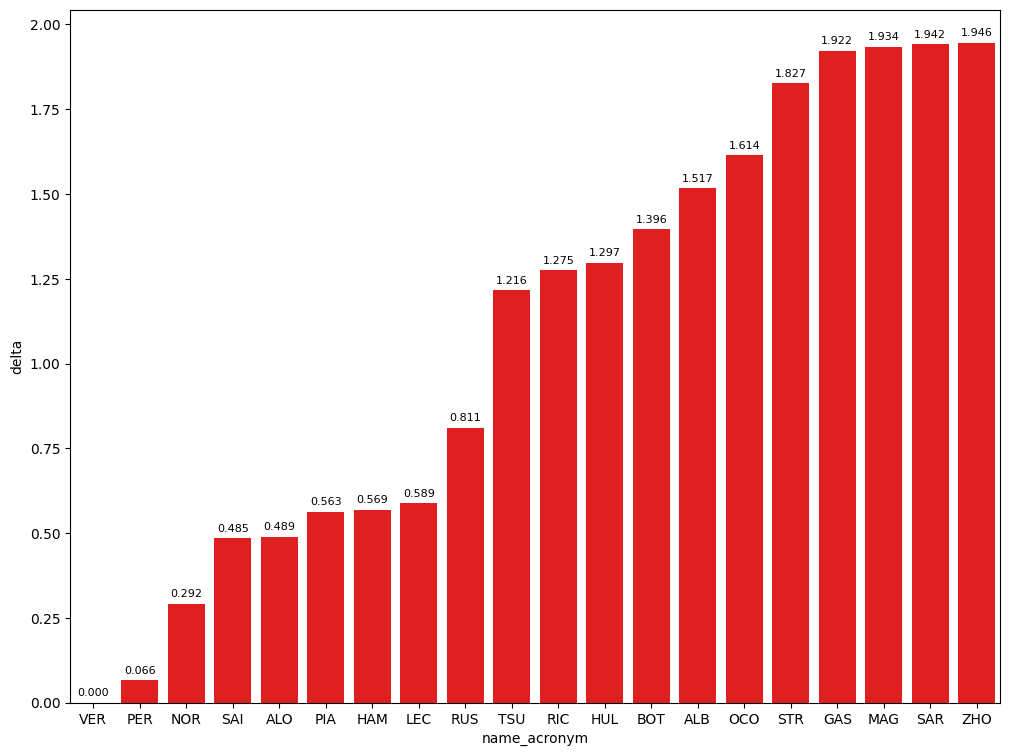

In [375]:
obtainchart("name_acronym","delta",jointables.sort_values(by=['fastest_lap'],ascending=True))

#### Speed trap per driver

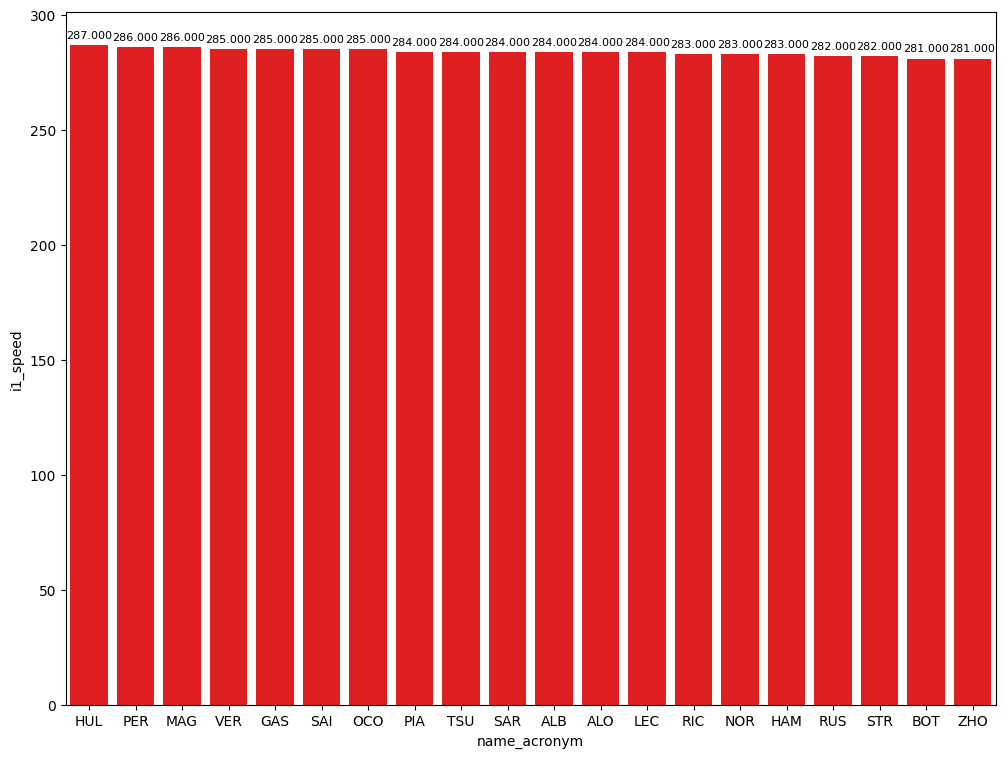

In [376]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
obtainchart("name_acronym","i1_speed",top_speed)

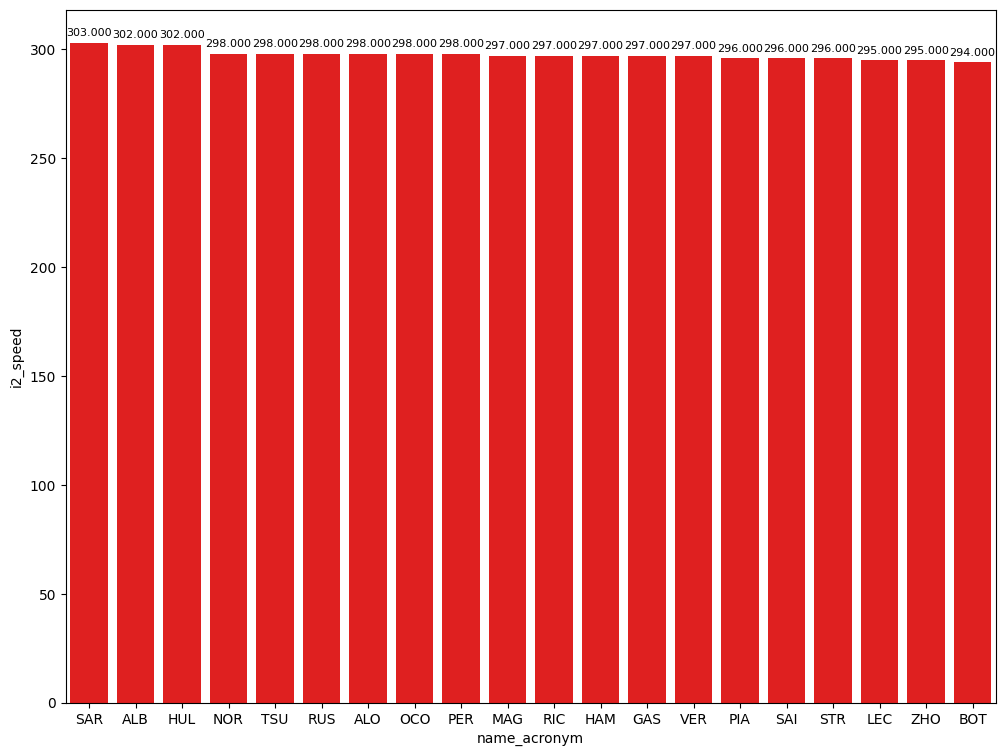

In [377]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
obtainchart("name_acronym","i2_speed",top_speed)

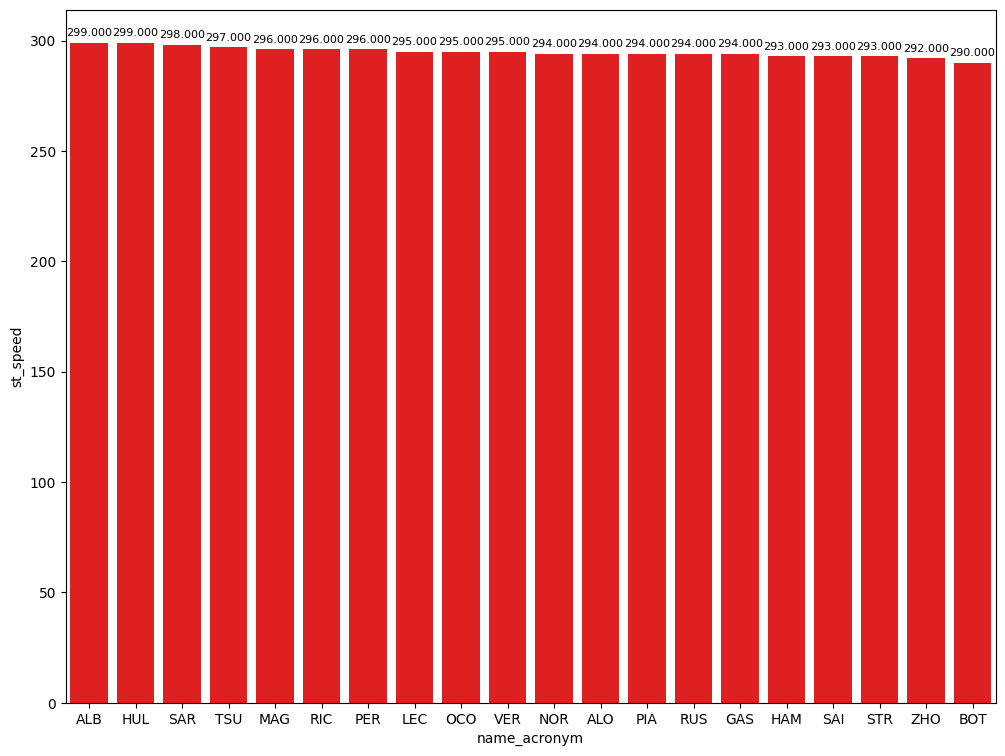

In [378]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
obtainchart("name_acronym","st_speed",top_speed)

#### Speed trap per teams

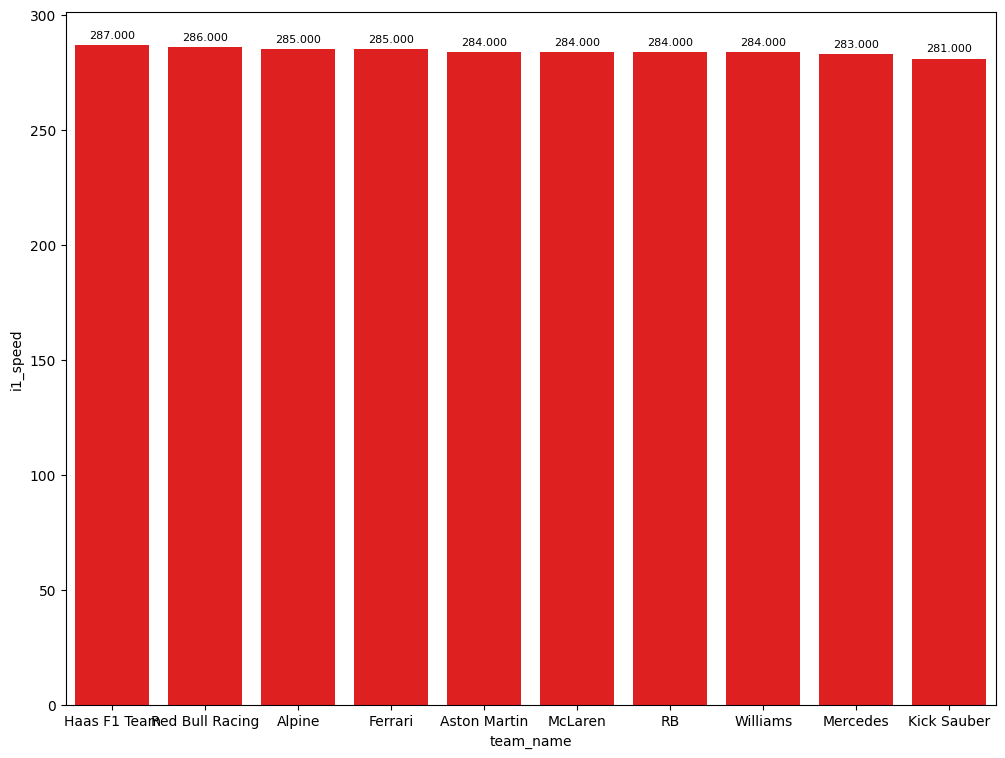

In [379]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
obtainchart("team_name","i1_speed",top_speed)

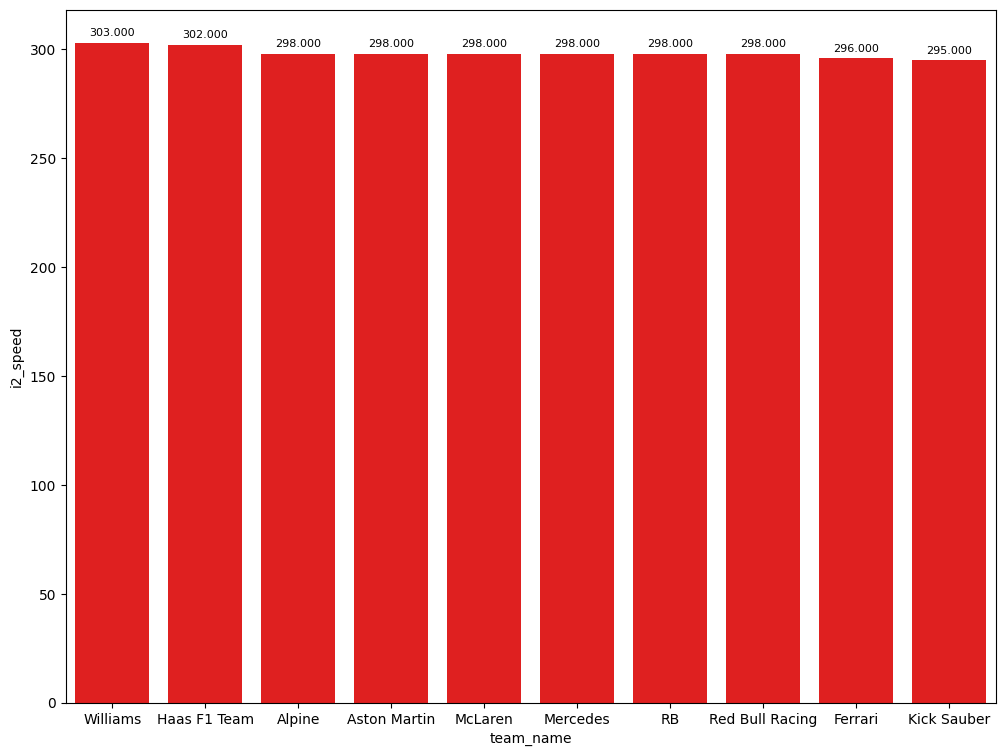

In [380]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
obtainchart("team_name","i2_speed",top_speed)

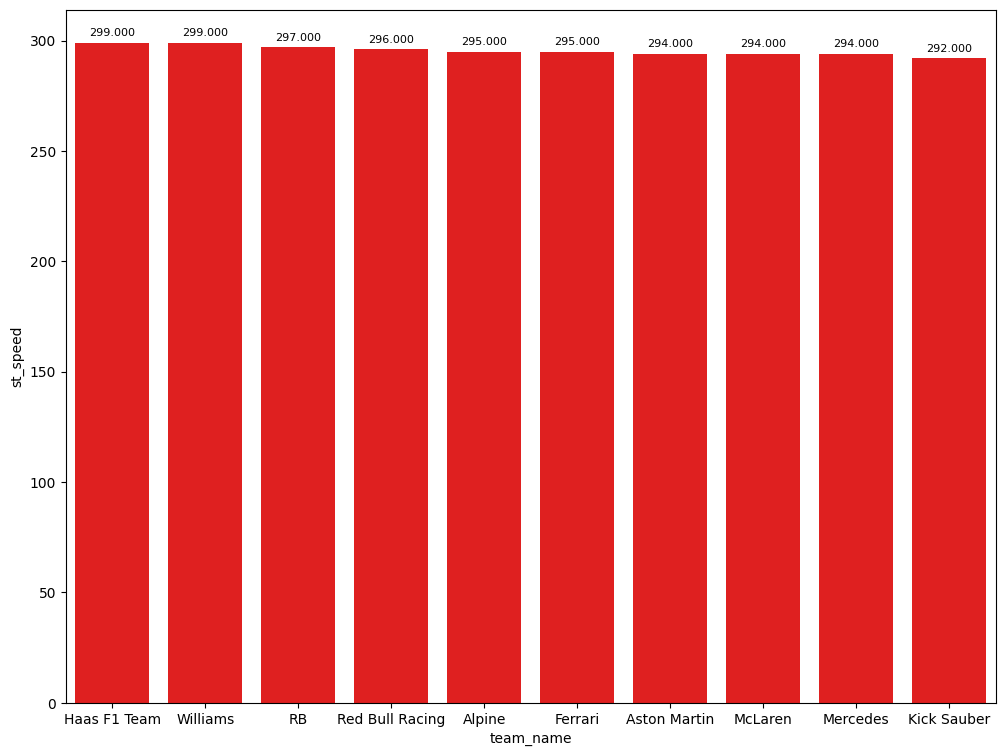

In [381]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
obtainchart("team_name","st_speed",top_speed)

In [382]:
mergequaly = pd.merge(competitiveLaps,drivers,on=['driver_number'])
mergequaly

,meeting_key_x,session_key_x,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,...,meeting_key_y,broadcast_name,country_code,first_name,full_name,headshot_url,last_name,team_colour,team_name,name_acronym
0,1232,9492,20,286,297,296,2024-04-06T06:01:48.350000,91.203,False,32.214,...,1229,K MAGNUSSEN,DEN,Kevin,Kevin MAGNUSSEN,https://media.formula1.com/d_driver_fallback_i...,Magnussen,b6babd,Haas F1 Team,MAG
1,1232,9492,20,288,303,299,2024-04-06T06:09:17.766000,90.662,False,32.145,...,1229,K MAGNUSSEN,DEN,Kevin,Kevin MAGNUSSEN,https://media.formula1.com/d_driver_fallback_i...,Magnussen,b6babd,Haas F1 Team,MAG
2,1232,9492,20,287,302,298,2024-04-06T06:16:32.968000,90.131,False,31.786,...,1229,K MAGNUSSEN,DEN,Kevin,Kevin MAGNUSSEN,https://media.formula1.com/d_driver_fallback_i...,Magnussen,b6babd,Haas F1 Team,MAG
3,1232,9492,2,285,303,298,2024-04-06T06:05:39.058000,90.643,False,32.194,...,1229,L SARGEANT,USA,Logan,Logan SARGEANT,https://media.formula1.com/d_driver_fallback_i...,Sargeant,64c4ff,Williams,SAR
4,1232,9492,2,284,303,298,2024-04-06T06:13:39.130000,90.139,False,31.744,...,1229,L SARGEANT,USA,Logan,Logan SARGEANT,https://media.formula1.com/d_driver_fallback_i...,Sargeant,64c4ff,Williams,SAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,1232,9492,24,282,295,293,2024-04-06T06:17:34.222000,90.143,False,31.685,...,1229,G ZHOU,CHN,Guanyu,ZHOU Guanyu,https://media.formula1.com/d_driver_fallback_i...,Zhou,5200000000000000190003903645130092385429788960...,Kick Sauber,ZHO
69,1232,9492,4,283,298,295,2024-04-06T06:08:43.843000,89.536,False,31.234,...,1229,L NORRIS,GBR,Lando,Lando NORRIS,https://media.formula1.com/d_driver_fallback_i...,Norris,ff8000,McLaren,NOR
70,1232,9492,4,285,300,295,2024-04-06T06:29:25.096000,88.940,False,30.996,...,1229,L NORRIS,GBR,Lando,Lando NORRIS,https://media.formula1.com/d_driver_fallback_i...,Norris,ff8000,McLaren,NOR
71,1232,9492,4,284,298,294,2024-04-06T06:51:10.055000,88.489,False,30.800,...,1229,L NORRIS,GBR,Lando,Lando NORRIS,https://media.formula1.com/d_driver_fallback_i...,Norris,ff8000,McLaren,NOR


In [383]:
def obtain_difference_regard_reference(row,reference,newdataset):
    difference_sector_1 = row.duration_sector_1 - reference.duration_sector_1.iloc[0]
    difference_sector_2 = row.duration_sector_2 - reference.duration_sector_2.iloc[0]
    difference_sector_3 = row.duration_sector_3 - reference.duration_sector_3.iloc[0]
    lap_duration = row.lap_duration - reference.lap_duration.iloc[0]
    new_row = {'driver_number':row.driver_number,'lap_duration':lap_duration,'difference_sector_1':difference_sector_1 ,'difference_sector_2':difference_sector_2,'difference_sector_3':difference_sector_3,'name_acronym':row.name_acronym   }
    
    newdataset =pd.concat([newdataset, pd.DataFrame([new_row])], ignore_index=True)
    return newdataset

In [384]:
# Function done to obtain more information about the qualyfing session
def obtainInfoAboutQualySession(dataset,fecha):
    sessiondataset =dataset.query(fecha).sort_values(by='lap_duration')
    isFastestLap = []
    for index,row in sessiondataset.iterrows():
        driver = row.driver_number
        fastest_lap = sessiondataset.query("driver_number == @driver").lap_duration.min()
        if row.lap_duration == fastest_lap:
            isFastestLap.append(True)
        else:
            isFastestLap.append(False)
    sessiondataset['isFastestLap'] = isFastestLap
    return sessiondataset

In [385]:
# In order to know when each session finished, race control dataset will be consulted.
maximumDateQ1 = "date_start <'2024-04-06T06:25:00'"
maximumDateQ2 = "date_start <'2024-04-06T06:48:00' and date_start >'2024-04-06T06:25:00'"
maximumDateQ3 = "date_start >'2024-04-06T06:48:00'"

#### Qualyfing 1

In [386]:
q1Data = obtainInfoAboutQualySession(mergequaly,maximumDateQ1).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)
q1Data

,meeting_key_x,session_key_x,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,...,broadcast_name,country_code,first_name,full_name,headshot_url,last_name,team_colour,team_name,name_acronym,isFastestLap
12,1232,9492,1,286,299,297,2024-04-06T06:06:13.988000,88.866,False,31.091,...,M VERSTAPPEN,NED,Max,Max VERSTAPPEN,https://media.formula1.com/d_driver_fallback_i...,Verstappen,3671c6,Red Bull Racing,VER,True
38,1232,9492,14,285,300,296,2024-04-06T06:07:13.549000,89.254,False,31.136,...,F ALONSO,ESP,Fernando,Fernando ALONSO,https://media.formula1.com/d_driver_fallback_i...,Alonso,229971,Aston Martin,ALO,True
8,1232,9492,11,286,299,297,2024-04-06T06:05:59.810000,89.303,False,31.255,...,S PEREZ,MEX,Sergio,Sergio PEREZ,https://media.formula1.com/d_driver_fallback_i...,Perez,3671c6,Red Bull Racing,PER,True
17,1232,9492,16,284,297,295,2024-04-06T06:16:14.268000,89.338,False,31.452,...,C LECLERC,MON,Charles,Charles LECLERC,https://media.formula1.com/d_driver_fallback_i...,Leclerc,e8002d,Ferrari,LEC,True
34,1232,9492,81,284,299,296,2024-04-06T06:06:57.441000,89.425,False,31.253,...,O PIASTRI,AUS,Oscar,Oscar PIASTRI,https://media.formula1.com/d_driver_fallback_i...,Piastri,ff8000,McLaren,PIA,True
20,1232,9492,55,285,298,295,2024-04-06T06:06:32.619000,89.513,False,31.369,...,C SAINZ,ESP,Carlos,Carlos SAINZ,https://media.formula1.com/d_driver_fallback_i...,Sainz,e8002d,Ferrari,SAI,True
69,1232,9492,4,283,298,295,2024-04-06T06:08:43.843000,89.536,False,31.234,...,L NORRIS,GBR,Lando,Lando NORRIS,https://media.formula1.com/d_driver_fallback_i...,Norris,ff8000,McLaren,NOR,True
64,1232,9492,77,282,295,293,2024-04-06T06:17:28.293000,89.602,False,31.509,...,V BOTTAS,FIN,Valtteri,Valtteri BOTTAS,https://media.formula1.com/d_driver_fallback_i...,Bottas,5200000000000000190003903645130092385429788960...,Kick Sauber,BOT,True
24,1232,9492,44,284,300,297,2024-04-06T06:06:40.835000,89.661,False,31.408,...,L HAMILTON,GBR,Lewis,Lewis HAMILTON,https://media.formula1.com/d_driver_fallback_i...,Hamilton,27f4d2,Mercedes,HAM,True
49,1232,9492,3,284,298,297,2024-04-06T06:17:13.492000,89.727,False,31.390,...,D RICCIARDO,AUS,Daniel,Daniel RICCIARDO,https://media.formula1.com/d_driver_fallback_i...,Ricciardo,6692ff,RB,RIC,True


##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [387]:
#Reference
P15 = q1Data[14:15]
P15

,meeting_key_x,session_key_x,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,...,broadcast_name,country_code,first_name,full_name,headshot_url,last_name,team_colour,team_name,name_acronym,isFastestLap
6,1232,9492,23,285,302,299,2024-04-06T06:13:29.876000,89.963,False,31.584,...,A ALBON,THA,Alexander,Alexander ALBON,https://media.formula1.com/d_driver_fallback_i...,Albon,64c4ff,Williams,ALB,True


In [388]:
print(
"Driver:",P15.full_name.to_string(index=False),
"Sector 1: ",P15.duration_sector_1.to_string(index=False),
"Sector 2: ",P15.duration_sector_2.to_string(index=False),
"Sector 3: ",P15.duration_sector_3.to_string(index=False)
)

Driver: Alexander ALBON Sector 1:  31.584 Sector 2:  40.602 Sector 3:  17.777


In [389]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[15::].iterrows():
    newdataset2 = obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

,driver_number,lap_duration,difference_sector_1,difference_sector_2,difference_sector_3,name_acronym
0,18,0.061,-0.086,-0.056,0.203,STR
1,10,0.156,-0.116,0.060,0.212,GAS
2,20,0.168,0.202,-0.120,0.086,MAG
3,2,0.176,0.160,-0.060,0.076,SAR
4,24,0.180,0.101,-0.115,0.194,ZHO


##### Best sector times per driver

###### Sector 1

In [390]:
pd.DataFrame(q1Data.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

,duration_sector_1
name_acronym,
VER,31.091
ALO,31.136
NOR,31.234
PIA,31.253
PER,31.255
TSU,31.358
SAI,31.369
RIC,31.390
HAM,31.408


##### Sector 2

In [391]:
pd.DataFrame(q1Data.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

,duration_sector_2
name_acronym,
LEC,40.084
VER,40.100
PER,40.218
ALO,40.272
SAI,40.292
RUS,40.338
BOT,40.359
PIA,40.367
HUL,40.394


##### Sector 3

In [392]:
pd.DataFrame(q1Data.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True))

,duration_sector_3
name_acronym,
VER,17.675
BOT,17.734
HUL,17.751
ALB,17.777
RUS,17.782
NOR,17.785
TSU,17.796
LEC,17.802
PIA,17.805


#### Qualyfing 2

In [393]:
q2Data = obtainInfoAboutQualySession(mergequaly,maximumDateQ2).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)
q2Data

,meeting_key_x,session_key_x,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,...,broadcast_name,country_code,first_name,full_name,headshot_url,last_name,team_colour,team_name,name_acronym,isFastestLap
13,1232,9492,1,286,298,296,2024-04-06T06:27:18.568000,88.740,False,31.063,...,M VERSTAPPEN,NED,Max,Max VERSTAPPEN,https://media.formula1.com/d_driver_fallback_i...,Verstappen,3671c6,Red Bull Racing,VER,True
9,1232,9492,11,286,298,298,2024-04-06T06:27:03.983000,88.752,False,31.047,...,S PEREZ,MEX,Sergio,Sergio PEREZ,https://media.formula1.com/d_driver_fallback_i...,Perez,3671c6,Red Bull Racing,PER,True
26,1232,9492,44,284,297,294,2024-04-06T06:38:13.046000,88.887,False,31.110,...,L HAMILTON,GBR,Lewis,Lewis HAMILTON,https://media.formula1.com/d_driver_fallback_i...,Hamilton,27f4d2,Mercedes,HAM,True
70,1232,9492,4,285,300,295,2024-04-06T06:29:25.096000,88.940,False,30.996,...,L NORRIS,GBR,Lando,Lando NORRIS,https://media.formula1.com/d_driver_fallback_i...,Norris,ff8000,McLaren,NOR,True
39,1232,9492,14,285,300,296,2024-04-06T06:29:06.134000,89.082,False,31.142,...,F ALONSO,ESP,Fernando,Fernando ALONSO,https://media.formula1.com/d_driver_fallback_i...,Alonso,229971,Aston Martin,ALO,True
21,1232,9492,55,286,298,295,2024-04-06T06:30:28.111000,89.099,False,31.203,...,C SAINZ,ESP,Carlos,Carlos SAINZ,https://media.formula1.com/d_driver_fallback_i...,Sainz,e8002d,Ferrari,SAI,True
31,1232,9492,63,283,298,295,2024-04-06T06:38:21.126000,89.140,False,31.330,...,G RUSSELL,GBR,George,George RUSSELL,https://media.formula1.com/d_driver_fallback_i...,Russell,27f4d2,Mercedes,RUS,True
35,1232,9492,81,286,300,298,2024-04-06T06:28:48.933000,89.148,False,31.020,...,O PIASTRI,AUS,Oscar,Oscar PIASTRI,https://media.formula1.com/d_driver_fallback_i...,Piastri,ff8000,McLaren,PIA,True
18,1232,9492,16,285,298,297,2024-04-06T06:30:20.046000,89.196,False,31.246,...,C LECLERC,MON,Charles,Charles LECLERC,https://media.formula1.com/d_driver_fallback_i...,Leclerc,e8002d,Ferrari,LEC,True
60,1232,9492,22,285,299,297,2024-04-06T06:39:02.025000,89.417,False,31.283,...,Y TSUNODA,JPN,Yuki,Yuki TSUNODA,https://media.formula1.com/d_driver_fallback_i...,Tsunoda,6692ff,RB,TSU,True


##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [394]:
#Reference
P10 = q2Data[9:10]
print(
"Driver:",P10.full_name.to_string(index=False),
"Sector 1: ",P10.duration_sector_1.to_string(index=False),
"Sector 2: ",P10.duration_sector_2.to_string(index=False),
"Sector 3: ",P10.duration_sector_3.to_string(index=False)
)

Driver: Yuki TSUNODA Sector 1:  31.283 Sector 2:  40.423 Sector 3:  17.711


In [395]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[10::].iterrows():
    newdataset2 = obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

,driver_number,lap_duration,difference_sector_1,difference_sector_2,difference_sector_3,name_acronym
0,3,0.055,0.069,-0.021,0.007,RIC
1,27,0.077,0.275,-0.185,-0.013,HUL
2,77,0.176,0.074,0.055,0.047,BOT
3,23,0.297,0.334,-0.042,0.005,ALB
4,31,0.399,0.191,0.058,0.150,OCO


##### Best sector times per driver

##### Sector 1

In [396]:
pd.DataFrame(q2Data.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

,duration_sector_1
name_acronym,
NOR,30.996
PIA,31.020
PER,31.047
VER,31.063
HAM,31.110
ALO,31.142
SAI,31.203
LEC,31.246
TSU,31.283


##### Sector 2

In [397]:
pd.DataFrame(q2Data.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

,duration_sector_2
name_acronym,
PER,40.008
HAM,40.050
VER,40.056
RUS,40.092
LEC,40.093
SAI,40.174
ALO,40.179
NOR,40.230
HUL,40.238


##### Sector 3

In [398]:
pd.DataFrame(q2Data.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True))

,duration_sector_3
name_acronym,
VER,17.621
PER,17.697
HUL,17.698
TSU,17.711
NOR,17.714
ALB,17.716
RIC,17.718
RUS,17.718
SAI,17.722


In [399]:
q3Data = obtainInfoAboutQualySession(mergequaly,maximumDateQ3).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)
q3Data

,meeting_key_x,session_key_x,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,...,broadcast_name,country_code,first_name,full_name,headshot_url,last_name,team_colour,team_name,name_acronym,isFastestLap
15,1232,9492,1,285,297,295,2024-04-06T06:58:14.889000,88.197,False,30.777,...,M VERSTAPPEN,NED,Max,Max VERSTAPPEN,https://media.formula1.com/d_driver_fallback_i...,Verstappen,3671c6,Red Bull Racing,VER,True
11,1232,9492,11,286,300,297,2024-04-06T06:58:03.188000,88.263,False,30.846,...,S PEREZ,MEX,Sergio,Sergio PEREZ,https://media.formula1.com/d_driver_fallback_i...,Perez,3671c6,Red Bull Racing,PER,True
71,1232,9492,4,284,298,294,2024-04-06T06:51:10.055000,88.489,False,30.800,...,L NORRIS,GBR,Lando,Lando NORRIS,https://media.formula1.com/d_driver_fallback_i...,Norris,ff8000,McLaren,NOR,True
22,1232,9492,55,286,296,294,2024-04-06T06:50:53.087000,88.682,False,30.968,...,C SAINZ,ESP,Carlos,Carlos SAINZ,https://media.formula1.com/d_driver_fallback_i...,Sainz,e8002d,Ferrari,SAI,True
41,1232,9492,14,284,299,295,2024-04-06T06:58:51.421000,88.686,False,30.964,...,F ALONSO,ESP,Fernando,Fernando ALONSO,https://media.formula1.com/d_driver_fallback_i...,Alonso,229971,Aston Martin,ALO,True
36,1232,9492,81,286,296,294,2024-04-06T06:51:02.211000,88.760,False,30.837,...,O PIASTRI,AUS,Oscar,Oscar PIASTRI,https://media.formula1.com/d_driver_fallback_i...,Piastri,ff8000,McLaren,PIA,True
27,1232,9492,44,285,297,293,2024-04-06T06:50:03.245000,88.766,False,30.915,...,L HAMILTON,GBR,Lewis,Lewis HAMILTON,https://media.formula1.com/d_driver_fallback_i...,Hamilton,27f4d2,Mercedes,HAM,True
19,1232,9492,16,285,295,295,2024-04-06T06:55:15.377000,88.786,False,31.109,...,C LECLERC,MON,Charles,Charles LECLERC,https://media.formula1.com/d_driver_fallback_i...,Leclerc,e8002d,Ferrari,LEC,True
32,1232,9492,63,284,299,294,2024-04-06T06:50:11.322000,89.008,False,31.181,...,G RUSSELL,GBR,George,George RUSSELL,https://media.formula1.com/d_driver_fallback_i...,Russell,27f4d2,Mercedes,RUS,True
62,1232,9492,22,285,299,298,2024-04-06T06:58:33.147000,89.413,False,31.318,...,Y TSUNODA,JPN,Yuki,Yuki TSUNODA,https://media.formula1.com/d_driver_fallback_i...,Tsunoda,6692ff,RB,TSU,True


##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [400]:
#Reference
P1 = q3Data[:1]
print(
"Driver:",P1.full_name.to_string(index=False),
"Sector 1: ",P1.duration_sector_1.to_string(index=False),
"Sector 2: ",P1.duration_sector_2.to_string(index=False),
"Sector 3: ",P1.duration_sector_3.to_string(index=False)
)

Driver: Max VERSTAPPEN Sector 1:  30.777 Sector 2:  39.85 Sector 3:  17.57


In [401]:
newdataset2 = pd.DataFrame()
for index,row in q3Data[1::].iterrows():
    newdataset2 = obtain_difference_regard_reference(row,P1,newdataset2)
newdataset2

,driver_number,lap_duration,difference_sector_1,difference_sector_2,difference_sector_3,name_acronym
0,11,0.066,0.069,-0.087,0.084,PER
1,4,0.292,0.023,0.189,0.080,NOR
2,55,0.485,0.191,0.139,0.155,SAI
3,14,0.489,0.187,0.177,0.125,ALO
4,81,0.563,0.060,0.377,0.126,PIA
5,44,0.569,0.138,0.306,0.125,HAM
6,16,0.589,0.332,0.016,0.241,LEC
7,63,0.811,0.404,0.273,0.134,RUS
8,22,1.216,0.541,0.398,0.277,TSU


##### Best sector times per driver

###### Sector 1

In [402]:
pd.DataFrame(q3Data.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

,duration_sector_1
name_acronym,
VER,30.777
NOR,30.800
PIA,30.837
PER,30.846
HAM,30.915
ALO,30.964
SAI,30.968
LEC,31.109
RUS,31.181


###### Sector 2

In [403]:
pd.DataFrame(q3Data.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

,duration_sector_2
name_acronym,
PER,39.763
VER,39.850
LEC,39.866
SAI,39.989
ALO,40.027
NOR,40.039
RUS,40.123
HAM,40.156
PIA,40.227


###### Sector 3

In [404]:
pd.DataFrame(q3Data.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True))

,duration_sector_3
name_acronym,
VER,17.570
NOR,17.650
PER,17.654
ALO,17.695
HAM,17.695
PIA,17.696
RUS,17.704
SAI,17.725
LEC,17.811


##### Theorical laps

##### Sector 1

In [405]:
pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

,duration_sector_1
name_acronym,
VER,30.777
NOR,30.800
PIA,30.837
PER,30.846
HAM,30.915
ALO,30.964
SAI,30.968
RUS,31.073
LEC,31.109


##### Sector 2

In [406]:
pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

,duration_sector_2
name_acronym,
PER,39.763
VER,39.850
LEC,39.866
SAI,39.989
HAM,40.008
ALO,40.027
NOR,40.039
RUS,40.092
PIA,40.227


##### Sector 3

In [407]:
pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True))

,duration_sector_3
name_acronym,
VER,17.503
NOR,17.634
PER,17.654
ALO,17.695
HAM,17.695
PIA,17.696
HUL,17.698
ALB,17.699
RUS,17.704
